In [36]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 12px;
}

div.output_area pre {
    font-size: 12px;
}
</style>

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)
import datetime

# Phân tích trên 2 nguồn dữ liệu 
## Câu hỏi: Tìm 10 sản phẩm bán được nhiều nhất?

# 0. Load dữ liệu

In [3]:
# Header: order_id,product_id,add_to_cart_order,reordered
start_time = datetime.datetime.now()
csv_data = np.genfromtxt('data-instacart/order_products__train.csv', skip_header=1, 
                         delimiter=',', dtype=int)

end_time = datetime.datetime.now()
print("Đã load xong!")
print("Thời gian:", end_time - start_time)

Đã load xong!
Thời gian: 0:00:04.009529


In [4]:
print(csv_data.shape)
print(csv_data.T[-1])

(1384617, 4)
[1 1 0 ... 1 1 1]


In [5]:
np.count_nonzero(np.isnan(csv_data))

0

# 1. Phân tích mô tả
(đơn biến, không dùng đồ thị)

### 1.1. Phân tích theo số lượng products trong order

(Mỗi order có bao nhiêu products?)

In [6]:
# Lấy cột order_id (cột 0)
orders = csv_data.T[0]
values, counts = np.unique(orders, return_counts=True)
print(values)
print(counts)
print(values.size)

[      1      36      38 ... 3421058 3421063 3421070]
[8 8 9 ... 8 4 3]
131209


In [7]:
print(np.min(counts), np.max(counts))
print(np.mean(counts))
print(np.median(counts))

1 80
10.552759338155157
9.0


### 1.2. Phân tích theo product_id

(Mỗi product được order bao nhiêu lần?)

In [8]:
# Lấy cột product_id (cột 1)
product_id = csv_data.T[1]
values, counts = np.unique(product_id, return_counts=True)
print(values)
print(counts)
print(values.size)

[    1     2     3 ... 49686 49687 49688]
[76  4  6 ...  7  1  4]
39123


In [9]:
print(np.mean(counts))   # Trung bình mỗi product xuất hiện bao nhiêu lần
print(np.median(counts)) # Median của số lần products xuất hiện
print(np.max(counts))    # Mode của số lần products được mua nhiều nhất

35.39138102906219
5.0
18726


In [10]:
# Id của product được mua nhiều nhất
print(values[np.argmax(counts)])

24852


**Thử vẽ biểu đồ về phân bố số lần được order của các product**

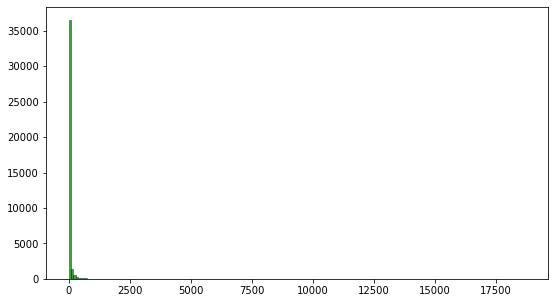

In [11]:
# bins = 200
fig,ax = plt.subplots(figsize=(9,5), num=1)
n, bins, edges = ax.hist(counts, bins=200,
                             color='green', alpha=.75, edgecolor='black', linewidth=0.5)

plt.show()

### 1.3. Phân tích theo reordered

(Mỗi product đã được reorder bao nhiêu lần?)

In [12]:
# Lấy cột reordered (cột 3)
reorders = csv_data.T[3]
reorder_product_id = product_id[reorders == 1]
print(reorder_product_id.size)

828824


In [13]:
values, counts = np.unique(reorder_product_id, return_counts=True)
print(values)
print(counts)
print(values.size)

[    1     2     3 ... 49683 49686 49688]
[  49    1    6 ... 1709    5    1]
30176


In [14]:
print(np.min(counts))
print(np.mean(counts))   # Trung bình mỗi product được reordered bao nhiêu lần
print(np.median(counts)) # Median của số lần products được reordered
print(np.max(counts))    # Mode của số lần products được reordered nhiều nhất

1
27.466330858960763
4.0
16557


In [15]:
# Id của product được reordered nhiều nhất
print(values[np.argmax(counts)])

24852


# 2. Phân tích theo các câu hỏi

## 2.1) Khách hàng thường mua bao nhiêu sản phẩm trong một đơn hàng?
Vẽ biểu đồ phân bố số sản phẩm trong đơn hàng

In [17]:
# Lấy cột order_id (cột 0)
orders = csv_data.T[0]
values, counts = np.unique(orders, return_counts=True)

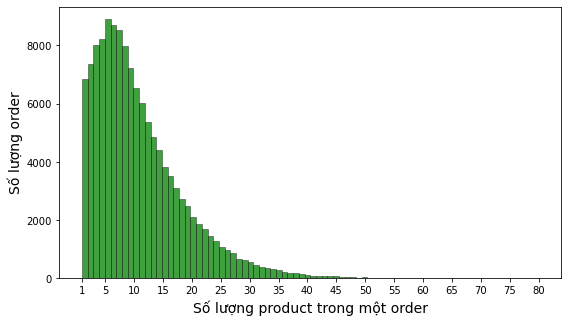

In [18]:
# bins = 80
fig,ax = plt.subplots(figsize=(9,5), num=1)
n, bins, edges = ax.hist(counts, bins=80,
                             color='green', alpha=.75, edgecolor='black', linewidth=0.5)

# Tạo nhãn trên trục x:
ax.set_xticks([int(bins[i]) for i in range(0,bins.size, 5)])
ax.set_xlabel("Số lượng product trong một order", fontsize=14)
ax.set_ylabel("Số lượng order", fontsize=14)

plt.show()

**==> Câu hỏi luyện tập: Hãy vẽ đường mean, median, mode**

In [ ]:
???

## 2.2) Những sản phẩm nào bán chạy nhất?

### 2.2.1) Vẽ biểu đồ 10 sản phẩm bán chạy nhất
<br>
(Cần đếm số lần mỗi sản phẩm bán được)

In [19]:
product_id = csv_data.T[1]
values, counts = np.unique(product_id, return_counts=True)

In [20]:
# Thử sắp xếp và lấy ra 10 giá trị lớn nhất mà product được bán
sorted(counts)[::-1][0:10]

[18726, 15480, 10894, 9784, 8135, 7409, 7293, 6494, 6033, 5546]

**Cần lấy ra id của các product trên**

In [21]:
# Sắp xếp 2 mảng [values,counts] cùng nhau: hàm lexsort
sorted_count_index = np.lexsort([values, counts])[::-1][0:10]
print("Vị trí của 10 product:", sorted_count_index)
print("id của 10 product:", values[sorted_count_index])

Vị trí của 10 product: [19574 10367 16685 17300 37499 37609 37164 13228 20648 22024]
id của 10 product: [24852 13176 21137 21903 47626 47766 47209 16797 26209 27966]


In [22]:
# Đưa các giá trị cần thiết vào biến
top10_product_id = values[sorted_count_index]
top10_product_count = counts[sorted_count_index]

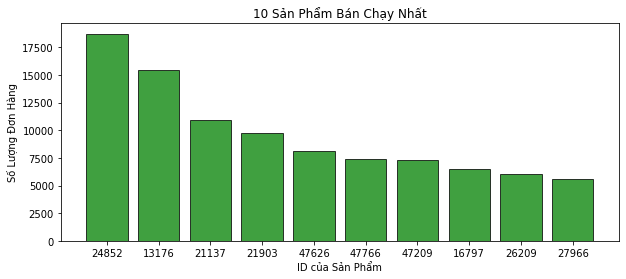

In [98]:
# Vẽ biểu đồ cột
plt.figure(figsize = (10,4))
plt.bar(x=range(10), height=top10_product_count, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Bán Chạy Nhất')
plt.xlabel('ID của Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_product_id, rotation='horizontal')
plt.show()

### 2.2.2) Cần lấy thông tin về tên của sản phẩm thay vì id
(Lấy tên sản phẩm trong file `products.csv`)

**Thử load file `products.csv` bằng `genfromtxt`**<br>
(Có thể lỗi)

In [25]:
# Header: product_id,product_name,aisle_id,department_id
# pro_data = np.loadtxt('data/products.csv', skiprows=1, delimiter=',', dtype=np.object)
pro_data = np.genfromtxt('data-instacart/products.csv', skip_header=1, 
                         delimiter=',', dtype=np.object, encoding='utf-8')

C:\Users\QUANG-~1\AppData\Local\Temp/ipykernel_15124/867799310.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delimiter=',', dtype=np.object, encoding='utf-8')


ValueError: Some errors were detected !
    Line #31 (got 5 columns instead of 4)
    Line #49 (got 6 columns instead of 4)
    Line #68 (got 5 columns instead of 4)
    Line #69 (got 5 columns instead of 4)
    Line #76 (got 5 columns instead of 4)
    Line #87 (got 5 columns instead of 4)
    Line #102 (got 5 columns instead of 4)
    Line #112 (got 5 columns instead of 4)
    Line #140 (got 5 columns instead of 4)
    Line #153 (got 5 columns instead of 4)
    Line #154 (got 5 columns instead of 4)
    Line #155 (got 6 columns instead of 4)
    Line #160 (got 5 columns instead of 4)
    Line #204 (got 5 columns instead of 4)
    Line #217 (got 5 columns instead of 4)
    Line #218 (got 5 columns instead of 4)
    Line #250 (got 6 columns instead of 4)
    Line #251 (got 5 columns instead of 4)
    Line #253 (got 5 columns instead of 4)
    Line #256 (got 6 columns instead of 4)
    Line #298 (got 7 columns instead of 4)
    Line #302 (got 5 columns instead of 4)
    Line #304 (got 5 columns instead of 4)
    Line #311 (got 7 columns instead of 4)
    Line #321 (got 6 columns instead of 4)
    Line #328 (got 6 columns instead of 4)
    Line #338 (got 7 columns instead of 4)
    Line #343 (got 5 columns instead of 4)
    Line #348 (got 5 columns instead of 4)
    Line #402 (got 7 columns instead of 4)
    Line #432 (got 5 columns instead of 4)
    Line #448 (got 9 columns instead of 4)
    Line #452 (got 5 columns instead of 4)
    Line #468 (got 7 columns instead of 4)
    Line #483 (got 5 columns instead of 4)
    Line #488 (got 5 columns instead of 4)
    Line #493 (got 6 columns instead of 4)
    Line #503 (got 6 columns instead of 4)
    Line #535 (got 5 columns instead of 4)
    Line #551 (got 6 columns instead of 4)
    Line #552 (got 6 columns instead of 4)
    Line #594 (got 5 columns instead of 4)
    Line #613 (got 6 columns instead of 4)
    Line #614 (got 6 columns instead of 4)
    Line #626 (got 5 columns instead of 4)
    Line #644 (got 6 columns instead of 4)
    Line #646 (got 5 columns instead of 4)
    Line #654 (got 5 columns instead of 4)
    Line #658 (got 6 columns instead of 4)
    Line #668 (got 5 columns instead of 4)
    Line #671 (got 5 columns instead of 4)
    Line #676 (got 5 columns instead of 4)
    Line #690 (got 5 columns instead of 4)
    Line #729 (got 5 columns instead of 4)
    Line #737 (got 5 columns instead of 4)
    Line #783 (got 5 columns instead of 4)
    Line #796 (got 6 columns instead of 4)
    Line #839 (got 7 columns instead of 4)
    Line #849 (got 6 columns instead of 4)
    Line #859 (got 5 columns instead of 4)
    Line #894 (got 5 columns instead of 4)
    Line #901 (got 5 columns instead of 4)
    Line #903 (got 6 columns instead of 4)
    Line #905 (got 6 columns instead of 4)
    Line #912 (got 6 columns instead of 4)
    Line #915 (got 6 columns instead of 4)
    Line #928 (got 6 columns instead of 4)
    Line #939 (got 5 columns instead of 4)
    Line #953 (got 5 columns instead of 4)
    Line #1021 (got 5 columns instead of 4)
    Line #1052 (got 5 columns instead of 4)
    Line #1058 (got 5 columns instead of 4)
    Line #1081 (got 5 columns instead of 4)
    Line #1090 (got 9 columns instead of 4)
    Line #1092 (got 5 columns instead of 4)
    Line #1148 (got 5 columns instead of 4)
    Line #1151 (got 5 columns instead of 4)
    Line #1164 (got 7 columns instead of 4)
    Line #1169 (got 5 columns instead of 4)
    Line #1198 (got 6 columns instead of 4)
    Line #1207 (got 6 columns instead of 4)
    Line #1218 (got 6 columns instead of 4)
    Line #1261 (got 5 columns instead of 4)
    Line #1274 (got 6 columns instead of 4)
    Line #1302 (got 6 columns instead of 4)
    Line #1308 (got 5 columns instead of 4)
    Line #1310 (got 7 columns instead of 4)
    Line #1321 (got 6 columns instead of 4)
    Line #1329 (got 5 columns instead of 4)
    Line #1338 (got 6 columns instead of 4)
    Line #1346 (got 7 columns instead of 4)
    Line #1357 (got 5 columns instead of 4)
    Line #1363 (got 5 columns instead of 4)
    Line #1370 (got 6 columns instead of 4)
    Line #1411 (got 5 columns instead of 4)
    Line #1412 (got 5 columns instead of 4)
    Line #1413 (got 5 columns instead of 4)
    Line #1415 (got 5 columns instead of 4)
    Line #1475 (got 5 columns instead of 4)
    Line #1510 (got 5 columns instead of 4)
    Line #1516 (got 5 columns instead of 4)
    Line #1521 (got 5 columns instead of 4)
    Line #1530 (got 6 columns instead of 4)
    Line #1546 (got 5 columns instead of 4)
    Line #1576 (got 5 columns instead of 4)
    Line #1598 (got 8 columns instead of 4)
    Line #1599 (got 5 columns instead of 4)
    Line #1607 (got 7 columns instead of 4)
    Line #1610 (got 5 columns instead of 4)
    Line #1613 (got 5 columns instead of 4)
    Line #1619 (got 6 columns instead of 4)
    Line #1633 (got 5 columns instead of 4)
    Line #1634 (got 5 columns instead of 4)
    Line #1659 (got 5 columns instead of 4)
    Line #1671 (got 6 columns instead of 4)
    Line #1735 (got 5 columns instead of 4)
    Line #1737 (got 8 columns instead of 4)
    Line #1780 (got 5 columns instead of 4)
    Line #1782 (got 5 columns instead of 4)
    Line #1794 (got 6 columns instead of 4)
    Line #1825 (got 5 columns instead of 4)
    Line #1854 (got 5 columns instead of 4)
    Line #1856 (got 5 columns instead of 4)
    Line #1866 (got 5 columns instead of 4)
    Line #1877 (got 5 columns instead of 4)
    Line #1878 (got 5 columns instead of 4)
    Line #1879 (got 6 columns instead of 4)
    Line #1907 (got 7 columns instead of 4)
    Line #1915 (got 5 columns instead of 4)
    Line #1930 (got 5 columns instead of 4)
    Line #1937 (got 7 columns instead of 4)
    Line #1947 (got 2 columns instead of 4)
    Line #1997 (got 5 columns instead of 4)
    Line #2009 (got 6 columns instead of 4)
    Line #2034 (got 5 columns instead of 4)
    Line #2036 (got 5 columns instead of 4)
    Line #2053 (got 6 columns instead of 4)
    Line #2059 (got 2 columns instead of 4)
    Line #2067 (got 7 columns instead of 4)
    Line #2088 (got 5 columns instead of 4)
    Line #2091 (got 5 columns instead of 4)
    Line #2095 (got 5 columns instead of 4)
    Line #2113 (got 5 columns instead of 4)
    Line #2151 (got 6 columns instead of 4)
    Line #2156 (got 7 columns instead of 4)
    Line #2159 (got 2 columns instead of 4)
    Line #2165 (got 6 columns instead of 4)
    Line #2256 (got 5 columns instead of 4)
    Line #2260 (got 5 columns instead of 4)
    Line #2264 (got 5 columns instead of 4)
    Line #2270 (got 5 columns instead of 4)
    Line #2280 (got 6 columns instead of 4)
    Line #2283 (got 5 columns instead of 4)
    Line #2297 (got 7 columns instead of 4)
    Line #2299 (got 7 columns instead of 4)
    Line #2354 (got 6 columns instead of 4)
    Line #2363 (got 5 columns instead of 4)
    Line #2382 (got 7 columns instead of 4)
    Line #2399 (got 5 columns instead of 4)
    Line #2404 (got 5 columns instead of 4)
    Line #2413 (got 5 columns instead of 4)
    Line #2421 (got 5 columns instead of 4)
    Line #2430 (got 5 columns instead of 4)
    Line #2450 (got 5 columns instead of 4)
    Line #2479 (got 5 columns instead of 4)
    Line #2485 (got 6 columns instead of 4)
    Line #2486 (got 6 columns instead of 4)
    Line #2505 (got 5 columns instead of 4)
    Line #2516 (got 5 columns instead of 4)
    Line #2527 (got 6 columns instead of 4)
    Line #2530 (got 5 columns instead of 4)
    Line #2543 (got 6 columns instead of 4)
    Line #2576 (got 6 columns instead of 4)
    Line #2581 (got 6 columns instead of 4)
    Line #2595 (got 5 columns instead of 4)
    Line #2596 (got 5 columns instead of 4)
    Line #2650 (got 5 columns instead of 4)
    Line #2654 (got 5 columns instead of 4)
    Line #2671 (got 7 columns instead of 4)
    Line #2702 (got 5 columns instead of 4)
    Line #2710 (got 5 columns instead of 4)
    Line #2720 (got 6 columns instead of 4)
    Line #2724 (got 5 columns instead of 4)
    Line #2727 (got 6 columns instead of 4)
    Line #2785 (got 6 columns instead of 4)
    Line #2803 (got 7 columns instead of 4)
    Line #2820 (got 5 columns instead of 4)
    Line #2830 (got 5 columns instead of 4)
    Line #2871 (got 5 columns instead of 4)
    Line #2875 (got 6 columns instead of 4)
    Line #2876 (got 6 columns instead of 4)
    Line #2893 (got 5 columns instead of 4)
    Line #2923 (got 7 columns instead of 4)
    Line #2924 (got 6 columns instead of 4)
    Line #2934 (got 5 columns instead of 4)
    Line #2944 (got 5 columns instead of 4)
    Line #2948 (got 7 columns instead of 4)
    Line #2963 (got 6 columns instead of 4)
    Line #2976 (got 6 columns instead of 4)
    Line #2995 (got 6 columns instead of 4)
    Line #3019 (got 5 columns instead of 4)
    Line #3029 (got 5 columns instead of 4)
    Line #3036 (got 6 columns instead of 4)
    Line #3050 (got 5 columns instead of 4)
    Line #3057 (got 6 columns instead of 4)
    Line #3082 (got 5 columns instead of 4)
    Line #3103 (got 6 columns instead of 4)
    Line #3124 (got 5 columns instead of 4)
    Line #3132 (got 5 columns instead of 4)
    Line #3179 (got 6 columns instead of 4)
    Line #3182 (got 5 columns instead of 4)
    Line #3213 (got 5 columns instead of 4)
    Line #3234 (got 5 columns instead of 4)
    Line #3265 (got 5 columns instead of 4)
    Line #3268 (got 5 columns instead of 4)
    Line #3273 (got 5 columns instead of 4)
    Line #3327 (got 5 columns instead of 4)
    Line #3359 (got 9 columns instead of 4)
    Line #3367 (got 6 columns instead of 4)
    Line #3370 (got 6 columns instead of 4)
    Line #3373 (got 6 columns instead of 4)
    Line #3379 (got 5 columns instead of 4)
    Line #3387 (got 6 columns instead of 4)
    Line #3440 (got 5 columns instead of 4)
    Line #3444 (got 5 columns instead of 4)
    Line #3465 (got 6 columns instead of 4)
    Line #3478 (got 6 columns instead of 4)
    Line #3479 (got 5 columns instead of 4)
    Line #3498 (got 5 columns instead of 4)
    Line #3524 (got 6 columns instead of 4)
    Line #3526 (got 6 columns instead of 4)
    Line #3532 (got 5 columns instead of 4)
    Line #3553 (got 5 columns instead of 4)
    Line #3569 (got 5 columns instead of 4)
    Line #3582 (got 6 columns instead of 4)
    Line #3613 (got 5 columns instead of 4)
    Line #3626 (got 5 columns instead of 4)
    Line #3680 (got 6 columns instead of 4)
    Line #3700 (got 6 columns instead of 4)
    Line #3704 (got 5 columns instead of 4)
    Line #3709 (got 5 columns instead of 4)
    Line #3731 (got 5 columns instead of 4)
    Line #3749 (got 6 columns instead of 4)
    Line #3751 (got 5 columns instead of 4)
    Line #3768 (got 5 columns instead of 4)
    Line #3776 (got 6 columns instead of 4)
    Line #3783 (got 5 columns instead of 4)
    Line #3807 (got 5 columns instead of 4)
    Line #3816 (got 5 columns instead of 4)
    Line #3836 (got 5 columns instead of 4)
    Line #3868 (got 5 columns instead of 4)
    Line #3876 (got 5 columns instead of 4)
    Line #3878 (got 6 columns instead of 4)
    Line #3888 (got 5 columns instead of 4)
    Line #3890 (got 5 columns instead of 4)
    Line #3922 (got 6 columns instead of 4)
    Line #3924 (got 5 columns instead of 4)
    Line #3925 (got 6 columns instead of 4)
    Line #3939 (got 5 columns instead of 4)
    Line #3945 (got 7 columns instead of 4)
    Line #4011 (got 5 columns instead of 4)
    Line #4022 (got 6 columns instead of 4)
    Line #4027 (got 5 columns instead of 4)
    Line #4030 (got 5 columns instead of 4)
    Line #4042 (got 6 columns instead of 4)
    Line #4066 (got 7 columns instead of 4)
    Line #4078 (got 5 columns instead of 4)
    Line #4083 (got 5 columns instead of 4)
    Line #4085 (got 5 columns instead of 4)
    Line #4097 (got 7 columns instead of 4)
    Line #4109 (got 5 columns instead of 4)
    Line #4121 (got 5 columns instead of 4)
    Line #4124 (got 5 columns instead of 4)
    Line #4156 (got 5 columns instead of 4)
    Line #4171 (got 6 columns instead of 4)
    Line #4185 (got 5 columns instead of 4)
    Line #4189 (got 5 columns instead of 4)
    Line #4190 (got 8 columns instead of 4)
    Line #4194 (got 5 columns instead of 4)
    Line #4199 (got 5 columns instead of 4)
    Line #4200 (got 5 columns instead of 4)
    Line #4214 (got 6 columns instead of 4)
    Line #4231 (got 6 columns instead of 4)
    Line #4233 (got 5 columns instead of 4)
    Line #4238 (got 6 columns instead of 4)
    Line #4286 (got 6 columns instead of 4)
    Line #4344 (got 5 columns instead of 4)
    Line #4349 (got 6 columns instead of 4)
    Line #4359 (got 6 columns instead of 4)
    Line #4398 (got 5 columns instead of 4)
    Line #4405 (got 5 columns instead of 4)
    Line #4428 (got 5 columns instead of 4)
    Line #4431 (got 5 columns instead of 4)
    Line #4438 (got 5 columns instead of 4)
    Line #4445 (got 5 columns instead of 4)
    Line #4465 (got 6 columns instead of 4)
    Line #4491 (got 7 columns instead of 4)
    Line #4507 (got 5 columns instead of 4)
    Line #4513 (got 6 columns instead of 4)
    Line #4532 (got 5 columns instead of 4)
    Line #4559 (got 6 columns instead of 4)
    Line #4574 (got 6 columns instead of 4)
    Line #4576 (got 5 columns instead of 4)
    Line #4578 (got 5 columns instead of 4)
    Line #4598 (got 5 columns instead of 4)
    Line #4599 (got 6 columns instead of 4)
    Line #4658 (got 6 columns instead of 4)
    Line #4698 (got 5 columns instead of 4)
    Line #4700 (got 5 columns instead of 4)
    Line #4716 (got 5 columns instead of 4)
    Line #4720 (got 5 columns instead of 4)
    Line #4726 (got 5 columns instead of 4)
    Line #4729 (got 5 columns instead of 4)
    Line #4756 (got 5 columns instead of 4)
    Line #4766 (got 5 columns instead of 4)
    Line #4774 (got 5 columns instead of 4)
    Line #4788 (got 5 columns instead of 4)
    Line #4795 (got 6 columns instead of 4)
    Line #4803 (got 5 columns instead of 4)
    Line #4815 (got 5 columns instead of 4)
    Line #4817 (got 5 columns instead of 4)
    Line #4832 (got 5 columns instead of 4)
    Line #4835 (got 5 columns instead of 4)
    Line #4843 (got 5 columns instead of 4)
    Line #4858 (got 5 columns instead of 4)
    Line #4865 (got 6 columns instead of 4)
    Line #4880 (got 5 columns instead of 4)
    Line #4897 (got 5 columns instead of 4)
    Line #4912 (got 6 columns instead of 4)
    Line #4924 (got 6 columns instead of 4)
    Line #4936 (got 5 columns instead of 4)
    Line #4968 (got 6 columns instead of 4)
    Line #4971 (got 5 columns instead of 4)
    Line #4988 (got 5 columns instead of 4)
    Line #5035 (got 5 columns instead of 4)
    Line #5041 (got 5 columns instead of 4)
    Line #5057 (got 5 columns instead of 4)
    Line #5076 (got 7 columns instead of 4)
    Line #5079 (got 6 columns instead of 4)
    Line #5087 (got 6 columns instead of 4)
    Line #5096 (got 7 columns instead of 4)
    Line #5101 (got 5 columns instead of 4)
    Line #5115 (got 5 columns instead of 4)
    Line #5118 (got 5 columns instead of 4)
    Line #5125 (got 5 columns instead of 4)
    Line #5140 (got 7 columns instead of 4)
    Line #5178 (got 6 columns instead of 4)
    Line #5180 (got 5 columns instead of 4)
    Line #5183 (got 5 columns instead of 4)
    Line #5228 (got 6 columns instead of 4)
    Line #5253 (got 7 columns instead of 4)
    Line #5257 (got 5 columns instead of 4)
    Line #5284 (got 5 columns instead of 4)
    Line #5291 (got 5 columns instead of 4)
    Line #5300 (got 8 columns instead of 4)
    Line #5315 (got 5 columns instead of 4)
    Line #5321 (got 5 columns instead of 4)
    Line #5341 (got 5 columns instead of 4)
    Line #5348 (got 7 columns instead of 4)
    Line #5353 (got 5 columns instead of 4)
    Line #5358 (got 5 columns instead of 4)
    Line #5369 (got 5 columns instead of 4)
    Line #5400 (got 5 columns instead of 4)
    Line #5407 (got 5 columns instead of 4)
    Line #5427 (got 6 columns instead of 4)
    Line #5428 (got 6 columns instead of 4)
    Line #5454 (got 6 columns instead of 4)
    Line #5475 (got 6 columns instead of 4)
    Line #5495 (got 6 columns instead of 4)
    Line #5501 (got 5 columns instead of 4)
    Line #5516 (got 5 columns instead of 4)
    Line #5524 (got 6 columns instead of 4)
    Line #5541 (got 5 columns instead of 4)
    Line #5545 (got 5 columns instead of 4)
    Line #5556 (got 5 columns instead of 4)
    Line #5577 (got 7 columns instead of 4)
    Line #5585 (got 6 columns instead of 4)
    Line #5598 (got 5 columns instead of 4)
    Line #5624 (got 5 columns instead of 4)
    Line #5629 (got 7 columns instead of 4)
    Line #5631 (got 7 columns instead of 4)
    Line #5640 (got 5 columns instead of 4)
    Line #5677 (got 5 columns instead of 4)
    Line #5746 (got 7 columns instead of 4)
    Line #5753 (got 5 columns instead of 4)
    Line #5756 (got 5 columns instead of 4)
    Line #5757 (got 6 columns instead of 4)
    Line #5758 (got 5 columns instead of 4)
    Line #5759 (got 5 columns instead of 4)
    Line #5776 (got 5 columns instead of 4)
    Line #5782 (got 5 columns instead of 4)
    Line #5791 (got 5 columns instead of 4)
    Line #5792 (got 6 columns instead of 4)
    Line #5802 (got 5 columns instead of 4)
    Line #5810 (got 6 columns instead of 4)
    Line #5811 (got 5 columns instead of 4)
    Line #5821 (got 7 columns instead of 4)
    Line #5834 (got 8 columns instead of 4)
    Line #5839 (got 5 columns instead of 4)
    Line #5849 (got 5 columns instead of 4)
    Line #5903 (got 5 columns instead of 4)
    Line #5920 (got 5 columns instead of 4)
    Line #5922 (got 7 columns instead of 4)
    Line #5923 (got 6 columns instead of 4)
    Line #5948 (got 5 columns instead of 4)
    Line #5954 (got 7 columns instead of 4)
    Line #5965 (got 2 columns instead of 4)
    Line #5991 (got 5 columns instead of 4)
    Line #6000 (got 5 columns instead of 4)
    Line #6017 (got 6 columns instead of 4)
    Line #6056 (got 5 columns instead of 4)
    Line #6064 (got 5 columns instead of 4)
    Line #6065 (got 5 columns instead of 4)
    Line #6069 (got 5 columns instead of 4)
    Line #6078 (got 8 columns instead of 4)
    Line #6096 (got 7 columns instead of 4)
    Line #6114 (got 5 columns instead of 4)
    Line #6119 (got 6 columns instead of 4)
    Line #6134 (got 6 columns instead of 4)
    Line #6213 (got 6 columns instead of 4)
    Line #6242 (got 5 columns instead of 4)
    Line #6299 (got 5 columns instead of 4)
    Line #6300 (got 5 columns instead of 4)
    Line #6320 (got 5 columns instead of 4)
    Line #6339 (got 5 columns instead of 4)
    Line #6344 (got 5 columns instead of 4)
    Line #6354 (got 5 columns instead of 4)
    Line #6361 (got 5 columns instead of 4)
    Line #6398 (got 6 columns instead of 4)
    Line #6399 (got 6 columns instead of 4)
    Line #6409 (got 5 columns instead of 4)
    Line #6412 (got 5 columns instead of 4)
    Line #6425 (got 5 columns instead of 4)
    Line #6481 (got 6 columns instead of 4)
    Line #6502 (got 5 columns instead of 4)
    Line #6512 (got 5 columns instead of 4)
    Line #6525 (got 7 columns instead of 4)
    Line #6526 (got 5 columns instead of 4)
    Line #6543 (got 5 columns instead of 4)
    Line #6544 (got 5 columns instead of 4)
    Line #6549 (got 5 columns instead of 4)
    Line #6554 (got 6 columns instead of 4)
    Line #6605 (got 5 columns instead of 4)
    Line #6622 (got 6 columns instead of 4)
    Line #6658 (got 5 columns instead of 4)
    Line #6680 (got 5 columns instead of 4)
    Line #6697 (got 5 columns instead of 4)
    Line #6712 (got 6 columns instead of 4)
    Line #6724 (got 5 columns instead of 4)
    Line #6742 (got 5 columns instead of 4)
    Line #6745 (got 6 columns instead of 4)
    Line #6747 (got 5 columns instead of 4)
    Line #6752 (got 5 columns instead of 4)
    Line #6779 (got 5 columns instead of 4)
    Line #6803 (got 5 columns instead of 4)
    Line #6817 (got 6 columns instead of 4)
    Line #6848 (got 5 columns instead of 4)
    Line #6899 (got 5 columns instead of 4)
    Line #6912 (got 5 columns instead of 4)
    Line #6917 (got 5 columns instead of 4)
    Line #6924 (got 5 columns instead of 4)
    Line #6931 (got 5 columns instead of 4)
    Line #6958 (got 6 columns instead of 4)
    Line #6969 (got 5 columns instead of 4)
    Line #6983 (got 6 columns instead of 4)
    Line #6987 (got 7 columns instead of 4)
    Line #6997 (got 5 columns instead of 4)
    Line #7002 (got 6 columns instead of 4)
    Line #7003 (got 5 columns instead of 4)
    Line #7006 (got 5 columns instead of 4)
    Line #7016 (got 5 columns instead of 4)
    Line #7019 (got 5 columns instead of 4)
    Line #7027 (got 5 columns instead of 4)
    Line #7052 (got 6 columns instead of 4)
    Line #7063 (got 5 columns instead of 4)
    Line #7065 (got 6 columns instead of 4)
    Line #7066 (got 6 columns instead of 4)
    Line #7068 (got 6 columns instead of 4)
    Line #7075 (got 7 columns instead of 4)
    Line #7102 (got 5 columns instead of 4)
    Line #7128 (got 6 columns instead of 4)
    Line #7136 (got 5 columns instead of 4)
    Line #7137 (got 5 columns instead of 4)
    Line #7139 (got 5 columns instead of 4)
    Line #7146 (got 6 columns instead of 4)
    Line #7188 (got 5 columns instead of 4)
    Line #7214 (got 6 columns instead of 4)
    Line #7231 (got 6 columns instead of 4)
    Line #7269 (got 5 columns instead of 4)
    Line #7281 (got 5 columns instead of 4)
    Line #7289 (got 5 columns instead of 4)
    Line #7290 (got 5 columns instead of 4)
    Line #7294 (got 5 columns instead of 4)
    Line #7295 (got 5 columns instead of 4)
    Line #7323 (got 5 columns instead of 4)
    Line #7330 (got 6 columns instead of 4)
    Line #7337 (got 7 columns instead of 4)
    Line #7350 (got 6 columns instead of 4)
    Line #7354 (got 5 columns instead of 4)
    Line #7361 (got 5 columns instead of 4)
    Line #7381 (got 6 columns instead of 4)
    Line #7389 (got 6 columns instead of 4)
    Line #7407 (got 5 columns instead of 4)
    Line #7409 (got 6 columns instead of 4)
    Line #7423 (got 6 columns instead of 4)
    Line #7445 (got 5 columns instead of 4)
    Line #7455 (got 5 columns instead of 4)
    Line #7472 (got 7 columns instead of 4)
    Line #7487 (got 5 columns instead of 4)
    Line #7521 (got 6 columns instead of 4)
    Line #7524 (got 6 columns instead of 4)
    Line #7528 (got 5 columns instead of 4)
    Line #7545 (got 5 columns instead of 4)
    Line #7595 (got 5 columns instead of 4)
    Line #7606 (got 5 columns instead of 4)
    Line #7628 (got 5 columns instead of 4)
    Line #7629 (got 6 columns instead of 4)
    Line #7636 (got 5 columns instead of 4)
    Line #7661 (got 5 columns instead of 4)
    Line #7680 (got 5 columns instead of 4)
    Line #7682 (got 5 columns instead of 4)
    Line #7685 (got 5 columns instead of 4)
    Line #7686 (got 5 columns instead of 4)
    Line #7704 (got 5 columns instead of 4)
    Line #7707 (got 5 columns instead of 4)
    Line #7710 (got 5 columns instead of 4)
    Line #7718 (got 7 columns instead of 4)
    Line #7789 (got 6 columns instead of 4)
    Line #7803 (got 7 columns instead of 4)
    Line #7820 (got 5 columns instead of 4)
    Line #7835 (got 5 columns instead of 4)
    Line #7880 (got 5 columns instead of 4)
    Line #7902 (got 7 columns instead of 4)
    Line #7904 (got 5 columns instead of 4)
    Line #7940 (got 6 columns instead of 4)
    Line #7959 (got 7 columns instead of 4)
    Line #7966 (got 5 columns instead of 4)
    Line #7980 (got 5 columns instead of 4)
    Line #7989 (got 5 columns instead of 4)
    Line #8060 (got 7 columns instead of 4)
    Line #8096 (got 5 columns instead of 4)
    Line #8100 (got 5 columns instead of 4)
    Line #8103 (got 5 columns instead of 4)
    Line #8138 (got 5 columns instead of 4)
    Line #8148 (got 5 columns instead of 4)
    Line #8179 (got 5 columns instead of 4)
    Line #8187 (got 5 columns instead of 4)
    Line #8206 (got 5 columns instead of 4)
    Line #8211 (got 5 columns instead of 4)
    Line #8214 (got 5 columns instead of 4)
    Line #8220 (got 5 columns instead of 4)
    Line #8242 (got 6 columns instead of 4)
    Line #8262 (got 5 columns instead of 4)
    Line #8265 (got 5 columns instead of 4)
    Line #8273 (got 5 columns instead of 4)
    Line #8295 (got 6 columns instead of 4)
    Line #8326 (got 5 columns instead of 4)
    Line #8342 (got 5 columns instead of 4)
    Line #8345 (got 8 columns instead of 4)
    Line #8384 (got 5 columns instead of 4)
    Line #8387 (got 5 columns instead of 4)
    Line #8400 (got 5 columns instead of 4)
    Line #8418 (got 5 columns instead of 4)
    Line #8420 (got 5 columns instead of 4)
    Line #8428 (got 7 columns instead of 4)
    Line #8430 (got 7 columns instead of 4)
    Line #8451 (got 6 columns instead of 4)
    Line #8455 (got 5 columns instead of 4)
    Line #8459 (got 5 columns instead of 4)
    Line #8467 (got 7 columns instead of 4)
    Line #8479 (got 6 columns instead of 4)
    Line #8501 (got 5 columns instead of 4)
    Line #8559 (got 6 columns instead of 4)
    Line #8567 (got 5 columns instead of 4)
    Line #8569 (got 6 columns instead of 4)
    Line #8584 (got 6 columns instead of 4)
    Line #8593 (got 12 columns instead of 4)
    Line #8606 (got 5 columns instead of 4)
    Line #8612 (got 5 columns instead of 4)
    Line #8619 (got 5 columns instead of 4)
    Line #8623 (got 6 columns instead of 4)
    Line #8624 (got 6 columns instead of 4)
    Line #8625 (got 5 columns instead of 4)
    Line #8629 (got 6 columns instead of 4)
    Line #8644 (got 5 columns instead of 4)
    Line #8705 (got 6 columns instead of 4)
    Line #8728 (got 6 columns instead of 4)
    Line #8743 (got 5 columns instead of 4)
    Line #8747 (got 5 columns instead of 4)
    Line #8753 (got 5 columns instead of 4)
    Line #8754 (got 5 columns instead of 4)
    Line #8756 (got 5 columns instead of 4)
    Line #8772 (got 5 columns instead of 4)
    Line #8788 (got 5 columns instead of 4)
    Line #8814 (got 5 columns instead of 4)
    Line #8820 (got 5 columns instead of 4)
    Line #8831 (got 5 columns instead of 4)
    Line #8834 (got 7 columns instead of 4)
    Line #8840 (got 5 columns instead of 4)
    Line #8841 (got 5 columns instead of 4)
    Line #8855 (got 5 columns instead of 4)
    Line #8861 (got 6 columns instead of 4)
    Line #8872 (got 5 columns instead of 4)
    Line #8875 (got 5 columns instead of 4)
    Line #8890 (got 7 columns instead of 4)
    Line #8913 (got 5 columns instead of 4)
    Line #8922 (got 6 columns instead of 4)
    Line #8948 (got 6 columns instead of 4)
    Line #8964 (got 5 columns instead of 4)
    Line #8972 (got 6 columns instead of 4)
    Line #8996 (got 6 columns instead of 4)
    Line #9053 (got 5 columns instead of 4)
    Line #9056 (got 5 columns instead of 4)
    Line #9063 (got 7 columns instead of 4)
    Line #9087 (got 6 columns instead of 4)
    Line #9088 (got 5 columns instead of 4)
    Line #9102 (got 7 columns instead of 4)
    Line #9114 (got 5 columns instead of 4)
    Line #9158 (got 6 columns instead of 4)
    Line #9165 (got 5 columns instead of 4)
    Line #9170 (got 6 columns instead of 4)
    Line #9178 (got 5 columns instead of 4)
    Line #9217 (got 6 columns instead of 4)
    Line #9228 (got 5 columns instead of 4)
    Line #9239 (got 5 columns instead of 4)
    Line #9261 (got 5 columns instead of 4)
    Line #9265 (got 5 columns instead of 4)
    Line #9268 (got 6 columns instead of 4)
    Line #9275 (got 7 columns instead of 4)
    Line #9302 (got 5 columns instead of 4)
    Line #9307 (got 7 columns instead of 4)
    Line #9310 (got 6 columns instead of 4)
    Line #9311 (got 5 columns instead of 4)
    Line #9318 (got 5 columns instead of 4)
    Line #9347 (got 5 columns instead of 4)
    Line #9350 (got 5 columns instead of 4)
    Line #9367 (got 2 columns instead of 4)
    Line #9380 (got 5 columns instead of 4)
    Line #9396 (got 5 columns instead of 4)
    Line #9414 (got 5 columns instead of 4)
    Line #9421 (got 5 columns instead of 4)
    Line #9441 (got 7 columns instead of 4)
    Line #9446 (got 5 columns instead of 4)
    Line #9450 (got 6 columns instead of 4)
    Line #9474 (got 6 columns instead of 4)
    Line #9519 (got 6 columns instead of 4)
    Line #9527 (got 5 columns instead of 4)
    Line #9530 (got 5 columns instead of 4)
    Line #9542 (got 2 columns instead of 4)
    Line #9561 (got 5 columns instead of 4)
    Line #9568 (got 5 columns instead of 4)
    Line #9573 (got 5 columns instead of 4)
    Line #9576 (got 5 columns instead of 4)
    Line #9593 (got 5 columns instead of 4)
    Line #9609 (got 5 columns instead of 4)
    Line #9613 (got 6 columns instead of 4)
    Line #9614 (got 6 columns instead of 4)
    Line #9634 (got 6 columns instead of 4)
    Line #9642 (got 5 columns instead of 4)
    Line #9658 (got 5 columns instead of 4)
    Line #9677 (got 5 columns instead of 4)
    Line #9679 (got 6 columns instead of 4)
    Line #9692 (got 5 columns instead of 4)
    Line #9706 (got 2 columns instead of 4)
    Line #9763 (got 5 columns instead of 4)
    Line #9777 (got 6 columns instead of 4)
    Line #9785 (got 5 columns instead of 4)
    Line #9793 (got 6 columns instead of 4)
    Line #9807 (got 6 columns instead of 4)
    Line #9815 (got 6 columns instead of 4)
    Line #9816 (got 8 columns instead of 4)
    Line #9822 (got 6 columns instead of 4)
    Line #9825 (got 5 columns instead of 4)
    Line #9861 (got 6 columns instead of 4)
    Line #9878 (got 6 columns instead of 4)
    Line #9916 (got 5 columns instead of 4)
    Line #9918 (got 5 columns instead of 4)
    Line #9925 (got 5 columns instead of 4)
    Line #9926 (got 5 columns instead of 4)
    Line #9967 (got 6 columns instead of 4)
    Line #9969 (got 5 columns instead of 4)
    Line #9972 (got 5 columns instead of 4)
    Line #9983 (got 6 columns instead of 4)
    Line #9999 (got 6 columns instead of 4)
    Line #10000 (got 6 columns instead of 4)
    Line #10006 (got 6 columns instead of 4)
    Line #10008 (got 3 columns instead of 4)
    Line #10037 (got 6 columns instead of 4)
    Line #10047 (got 5 columns instead of 4)
    Line #10072 (got 5 columns instead of 4)
    Line #10073 (got 6 columns instead of 4)
    Line #10125 (got 5 columns instead of 4)
    Line #10140 (got 5 columns instead of 4)
    Line #10147 (got 6 columns instead of 4)
    Line #10161 (got 7 columns instead of 4)
    Line #10169 (got 6 columns instead of 4)
    Line #10188 (got 5 columns instead of 4)
    Line #10201 (got 5 columns instead of 4)
    Line #10211 (got 5 columns instead of 4)
    Line #10234 (got 7 columns instead of 4)
    Line #10246 (got 5 columns instead of 4)
    Line #10325 (got 6 columns instead of 4)
    Line #10353 (got 6 columns instead of 4)
    Line #10365 (got 5 columns instead of 4)
    Line #10369 (got 5 columns instead of 4)
    Line #10393 (got 6 columns instead of 4)
    Line #10396 (got 5 columns instead of 4)
    Line #10436 (got 5 columns instead of 4)
    Line #10437 (got 5 columns instead of 4)
    Line #10481 (got 5 columns instead of 4)
    Line #10484 (got 5 columns instead of 4)
    Line #10500 (got 5 columns instead of 4)
    Line #10508 (got 5 columns instead of 4)
    Line #10536 (got 6 columns instead of 4)
    Line #10540 (got 5 columns instead of 4)
    Line #10576 (got 6 columns instead of 4)
    Line #10583 (got 5 columns instead of 4)
    Line #10591 (got 6 columns instead of 4)
    Line #10620 (got 7 columns instead of 4)
    Line #10632 (got 6 columns instead of 4)
    Line #10634 (got 5 columns instead of 4)
    Line #10637 (got 6 columns instead of 4)
    Line #10660 (got 5 columns instead of 4)
    Line #10685 (got 5 columns instead of 4)
    Line #10705 (got 6 columns instead of 4)
    Line #10711 (got 5 columns instead of 4)
    Line #10747 (got 5 columns instead of 4)
    Line #10801 (got 7 columns instead of 4)
    Line #10829 (got 5 columns instead of 4)
    Line #10865 (got 6 columns instead of 4)
    Line #10882 (got 6 columns instead of 4)
    Line #10887 (got 5 columns instead of 4)
    Line #10938 (got 5 columns instead of 4)
    Line #10941 (got 7 columns instead of 4)
    Line #10954 (got 6 columns instead of 4)
    Line #10995 (got 5 columns instead of 4)
    Line #10998 (got 8 columns instead of 4)
    Line #11001 (got 6 columns instead of 4)
    Line #11012 (got 7 columns instead of 4)
    Line #11014 (got 5 columns instead of 4)
    Line #11096 (got 6 columns instead of 4)
    Line #11112 (got 6 columns instead of 4)
    Line #11134 (got 5 columns instead of 4)
    Line #11178 (got 5 columns instead of 4)
    Line #11182 (got 6 columns instead of 4)
    Line #11198 (got 7 columns instead of 4)
    Line #11204 (got 5 columns instead of 4)
    Line #11223 (got 6 columns instead of 4)
    Line #11244 (got 5 columns instead of 4)
    Line #11270 (got 7 columns instead of 4)
    Line #11303 (got 5 columns instead of 4)
    Line #11313 (got 6 columns instead of 4)
    Line #11347 (got 5 columns instead of 4)
    Line #11359 (got 5 columns instead of 4)
    Line #11378 (got 7 columns instead of 4)
    Line #11382 (got 7 columns instead of 4)
    Line #11414 (got 5 columns instead of 4)
    Line #11426 (got 5 columns instead of 4)
    Line #11440 (got 5 columns instead of 4)
    Line #11450 (got 5 columns instead of 4)
    Line #11470 (got 5 columns instead of 4)
    Line #11498 (got 6 columns instead of 4)
    Line #11510 (got 5 columns instead of 4)
    Line #11517 (got 5 columns instead of 4)
    Line #11531 (got 5 columns instead of 4)
    Line #11561 (got 6 columns instead of 4)
    Line #11582 (got 5 columns instead of 4)
    Line #11606 (got 6 columns instead of 4)
    Line #11613 (got 5 columns instead of 4)
    Line #11631 (got 5 columns instead of 4)
    Line #11644 (got 5 columns instead of 4)
    Line #11675 (got 7 columns instead of 4)
    Line #11687 (got 6 columns instead of 4)
    Line #11719 (got 5 columns instead of 4)
    Line #11720 (got 5 columns instead of 4)
    Line #11723 (got 5 columns instead of 4)
    Line #11769 (got 5 columns instead of 4)
    Line #11782 (got 6 columns instead of 4)
    Line #11784 (got 5 columns instead of 4)
    Line #11875 (got 5 columns instead of 4)
    Line #11879 (got 6 columns instead of 4)
    Line #11881 (got 5 columns instead of 4)
    Line #11886 (got 5 columns instead of 4)
    Line #11902 (got 5 columns instead of 4)
    Line #11912 (got 6 columns instead of 4)
    Line #11920 (got 6 columns instead of 4)
    Line #11942 (got 6 columns instead of 4)
    Line #11948 (got 6 columns instead of 4)
    Line #11963 (got 6 columns instead of 4)
    Line #11995 (got 5 columns instead of 4)
    Line #11999 (got 2 columns instead of 4)
    Line #12006 (got 6 columns instead of 4)
    Line #12021 (got 6 columns instead of 4)
    Line #12032 (got 5 columns instead of 4)
    Line #12035 (got 6 columns instead of 4)
    Line #12038 (got 6 columns instead of 4)
    Line #12056 (got 5 columns instead of 4)
    Line #12058 (got 5 columns instead of 4)
    Line #12087 (got 5 columns instead of 4)
    Line #12106 (got 5 columns instead of 4)
    Line #12115 (got 5 columns instead of 4)
    Line #12124 (got 5 columns instead of 4)
    Line #12136 (got 5 columns instead of 4)
    Line #12151 (got 6 columns instead of 4)
    Line #12154 (got 5 columns instead of 4)
    Line #12175 (got 5 columns instead of 4)
    Line #12177 (got 5 columns instead of 4)
    Line #12196 (got 5 columns instead of 4)
    Line #12198 (got 6 columns instead of 4)
    Line #12240 (got 5 columns instead of 4)
    Line #12252 (got 6 columns instead of 4)
    Line #12267 (got 6 columns instead of 4)
    Line #12293 (got 5 columns instead of 4)
    Line #12301 (got 5 columns instead of 4)
    Line #12303 (got 5 columns instead of 4)
    Line #12314 (got 7 columns instead of 4)
    Line #12323 (got 5 columns instead of 4)
    Line #12344 (got 5 columns instead of 4)
    Line #12370 (got 5 columns instead of 4)
    Line #12380 (got 5 columns instead of 4)
    Line #12386 (got 5 columns instead of 4)
    Line #12403 (got 5 columns instead of 4)
    Line #12412 (got 6 columns instead of 4)
    Line #12462 (got 6 columns instead of 4)
    Line #12479 (got 5 columns instead of 4)
    Line #12483 (got 5 columns instead of 4)
    Line #12513 (got 5 columns instead of 4)
    Line #12538 (got 6 columns instead of 4)
    Line #12550 (got 6 columns instead of 4)
    Line #12553 (got 6 columns instead of 4)
    Line #12576 (got 8 columns instead of 4)
    Line #12593 (got 7 columns instead of 4)
    Line #12640 (got 6 columns instead of 4)
    Line #12696 (got 5 columns instead of 4)
    Line #12715 (got 7 columns instead of 4)
    Line #12729 (got 5 columns instead of 4)
    Line #12746 (got 6 columns instead of 4)
    Line #12829 (got 5 columns instead of 4)
    Line #12864 (got 5 columns instead of 4)
    Line #12912 (got 5 columns instead of 4)
    Line #12956 (got 6 columns instead of 4)
    Line #12967 (got 6 columns instead of 4)
    Line #12972 (got 7 columns instead of 4)
    Line #12973 (got 6 columns instead of 4)
    Line #12990 (got 7 columns instead of 4)
    Line #12994 (got 6 columns instead of 4)
    Line #13001 (got 7 columns instead of 4)
    Line #13002 (got 5 columns instead of 4)
    Line #13024 (got 5 columns instead of 4)
    Line #13026 (got 5 columns instead of 4)
    Line #13029 (got 6 columns instead of 4)
    Line #13035 (got 7 columns instead of 4)
    Line #13040 (got 5 columns instead of 4)
    Line #13042 (got 6 columns instead of 4)
    Line #13063 (got 5 columns instead of 4)
    Line #13109 (got 5 columns instead of 4)
    Line #13120 (got 5 columns instead of 4)
    Line #13124 (got 6 columns instead of 4)
    Line #13127 (got 6 columns instead of 4)
    Line #13130 (got 6 columns instead of 4)
    Line #13167 (got 5 columns instead of 4)
    Line #13171 (got 5 columns instead of 4)
    Line #13186 (got 7 columns instead of 4)
    Line #13206 (got 6 columns instead of 4)
    Line #13224 (got 5 columns instead of 4)
    Line #13227 (got 6 columns instead of 4)
    Line #13239 (got 5 columns instead of 4)
    Line #13241 (got 6 columns instead of 4)
    Line #13246 (got 5 columns instead of 4)
    Line #13266 (got 6 columns instead of 4)
    Line #13271 (got 5 columns instead of 4)
    Line #13279 (got 6 columns instead of 4)
    Line #13293 (got 6 columns instead of 4)
    Line #13298 (got 5 columns instead of 4)
    Line #13301 (got 5 columns instead of 4)
    Line #13304 (got 5 columns instead of 4)
    Line #13307 (got 5 columns instead of 4)
    Line #13308 (got 6 columns instead of 4)
    Line #13338 (got 6 columns instead of 4)
    Line #13353 (got 6 columns instead of 4)
    Line #13364 (got 6 columns instead of 4)
    Line #13368 (got 5 columns instead of 4)
    Line #13375 (got 5 columns instead of 4)
    Line #13380 (got 5 columns instead of 4)
    Line #13398 (got 5 columns instead of 4)
    Line #13401 (got 5 columns instead of 4)
    Line #13412 (got 5 columns instead of 4)
    Line #13421 (got 6 columns instead of 4)
    Line #13433 (got 5 columns instead of 4)
    Line #13450 (got 5 columns instead of 4)
    Line #13470 (got 6 columns instead of 4)
    Line #13541 (got 5 columns instead of 4)
    Line #13552 (got 6 columns instead of 4)
    Line #13572 (got 6 columns instead of 4)
    Line #13610 (got 5 columns instead of 4)
    Line #13616 (got 6 columns instead of 4)
    Line #13634 (got 6 columns instead of 4)
    Line #13650 (got 5 columns instead of 4)
    Line #13671 (got 5 columns instead of 4)
    Line #13687 (got 5 columns instead of 4)
    Line #13709 (got 6 columns instead of 4)
    Line #13715 (got 5 columns instead of 4)
    Line #13724 (got 5 columns instead of 4)
    Line #13748 (got 5 columns instead of 4)
    Line #13759 (got 6 columns instead of 4)
    Line #13769 (got 6 columns instead of 4)
    Line #13805 (got 6 columns instead of 4)
    Line #13810 (got 5 columns instead of 4)
    Line #13834 (got 5 columns instead of 4)
    Line #13840 (got 5 columns instead of 4)
    Line #13841 (got 6 columns instead of 4)
    Line #13851 (got 5 columns instead of 4)
    Line #13860 (got 5 columns instead of 4)
    Line #13869 (got 5 columns instead of 4)
    Line #13914 (got 5 columns instead of 4)
    Line #13921 (got 6 columns instead of 4)
    Line #13929 (got 6 columns instead of 4)
    Line #13953 (got 5 columns instead of 4)
    Line #13973 (got 6 columns instead of 4)
    Line #13981 (got 5 columns instead of 4)
    Line #13987 (got 5 columns instead of 4)
    Line #13995 (got 5 columns instead of 4)
    Line #14016 (got 5 columns instead of 4)
    Line #14027 (got 5 columns instead of 4)
    Line #14044 (got 5 columns instead of 4)
    Line #14057 (got 5 columns instead of 4)
    Line #14066 (got 5 columns instead of 4)
    Line #14074 (got 5 columns instead of 4)
    Line #14075 (got 6 columns instead of 4)
    Line #14096 (got 6 columns instead of 4)
    Line #14112 (got 5 columns instead of 4)
    Line #14151 (got 5 columns instead of 4)
    Line #14179 (got 5 columns instead of 4)
    Line #14195 (got 6 columns instead of 4)
    Line #14202 (got 5 columns instead of 4)
    Line #14207 (got 6 columns instead of 4)
    Line #14217 (got 6 columns instead of 4)
    Line #14223 (got 6 columns instead of 4)
    Line #14230 (got 5 columns instead of 4)
    Line #14237 (got 5 columns instead of 4)
    Line #14246 (got 6 columns instead of 4)
    Line #14250 (got 7 columns instead of 4)
    Line #14261 (got 5 columns instead of 4)
    Line #14267 (got 5 columns instead of 4)
    Line #14295 (got 5 columns instead of 4)
    Line #14337 (got 5 columns instead of 4)
    Line #14342 (got 5 columns instead of 4)
    Line #14370 (got 5 columns instead of 4)
    Line #14374 (got 5 columns instead of 4)
    Line #14378 (got 7 columns instead of 4)
    Line #14383 (got 5 columns instead of 4)
    Line #14395 (got 5 columns instead of 4)
    Line #14401 (got 5 columns instead of 4)
    Line #14418 (got 5 columns instead of 4)
    Line #14439 (got 5 columns instead of 4)
    Line #14449 (got 5 columns instead of 4)
    Line #14484 (got 6 columns instead of 4)
    Line #14492 (got 6 columns instead of 4)
    Line #14498 (got 6 columns instead of 4)
    Line #14504 (got 5 columns instead of 4)
    Line #14522 (got 5 columns instead of 4)
    Line #14534 (got 5 columns instead of 4)
    Line #14544 (got 5 columns instead of 4)
    Line #14545 (got 5 columns instead of 4)
    Line #14552 (got 5 columns instead of 4)
    Line #14602 (got 5 columns instead of 4)
    Line #14614 (got 5 columns instead of 4)
    Line #14636 (got 5 columns instead of 4)
    Line #14638 (got 6 columns instead of 4)
    Line #14645 (got 6 columns instead of 4)
    Line #14647 (got 5 columns instead of 4)
    Line #14670 (got 5 columns instead of 4)
    Line #14680 (got 5 columns instead of 4)
    Line #14700 (got 7 columns instead of 4)
    Line #14707 (got 7 columns instead of 4)
    Line #14715 (got 8 columns instead of 4)
    Line #14736 (got 6 columns instead of 4)
    Line #14751 (got 6 columns instead of 4)
    Line #14757 (got 5 columns instead of 4)
    Line #14766 (got 6 columns instead of 4)
    Line #14773 (got 5 columns instead of 4)
    Line #14780 (got 6 columns instead of 4)
    Line #14783 (got 5 columns instead of 4)
    Line #14790 (got 5 columns instead of 4)
    Line #14794 (got 5 columns instead of 4)
    Line #14798 (got 5 columns instead of 4)
    Line #14814 (got 5 columns instead of 4)
    Line #14823 (got 5 columns instead of 4)
    Line #14824 (got 5 columns instead of 4)
    Line #14825 (got 6 columns instead of 4)
    Line #14858 (got 5 columns instead of 4)
    Line #14913 (got 5 columns instead of 4)
    Line #14929 (got 5 columns instead of 4)
    Line #14966 (got 5 columns instead of 4)
    Line #14974 (got 6 columns instead of 4)
    Line #14978 (got 6 columns instead of 4)
    Line #15006 (got 5 columns instead of 4)
    Line #15012 (got 5 columns instead of 4)
    Line #15029 (got 6 columns instead of 4)
    Line #15036 (got 6 columns instead of 4)
    Line #15042 (got 5 columns instead of 4)
    Line #15073 (got 5 columns instead of 4)
    Line #15074 (got 5 columns instead of 4)
    Line #15076 (got 6 columns instead of 4)
    Line #15082 (got 7 columns instead of 4)
    Line #15118 (got 5 columns instead of 4)
    Line #15136 (got 5 columns instead of 4)
    Line #15171 (got 5 columns instead of 4)
    Line #15183 (got 5 columns instead of 4)
    Line #15185 (got 5 columns instead of 4)
    Line #15198 (got 5 columns instead of 4)
    Line #15209 (got 5 columns instead of 4)
    Line #15211 (got 7 columns instead of 4)
    Line #15219 (got 6 columns instead of 4)
    Line #15221 (got 5 columns instead of 4)
    Line #15228 (got 7 columns instead of 4)
    Line #15240 (got 5 columns instead of 4)
    Line #15244 (got 7 columns instead of 4)
    Line #15245 (got 5 columns instead of 4)
    Line #15289 (got 5 columns instead of 4)
    Line #15306 (got 5 columns instead of 4)
    Line #15320 (got 6 columns instead of 4)
    Line #15332 (got 5 columns instead of 4)
    Line #15374 (got 6 columns instead of 4)
    Line #15379 (got 5 columns instead of 4)
    Line #15394 (got 5 columns instead of 4)
    Line #15398 (got 5 columns instead of 4)
    Line #15400 (got 5 columns instead of 4)
    Line #15408 (got 5 columns instead of 4)
    Line #15410 (got 5 columns instead of 4)
    Line #15429 (got 7 columns instead of 4)
    Line #15439 (got 5 columns instead of 4)
    Line #15459 (got 5 columns instead of 4)
    Line #15460 (got 5 columns instead of 4)
    Line #15497 (got 5 columns instead of 4)
    Line #15501 (got 7 columns instead of 4)
    Line #15514 (got 7 columns instead of 4)
    Line #15520 (got 6 columns instead of 4)
    Line #15526 (got 7 columns instead of 4)
    Line #15534 (got 5 columns instead of 4)
    Line #15573 (got 6 columns instead of 4)
    Line #15584 (got 5 columns instead of 4)
    Line #15612 (got 9 columns instead of 4)
    Line #15617 (got 5 columns instead of 4)
    Line #15638 (got 7 columns instead of 4)
    Line #15662 (got 5 columns instead of 4)
    Line #15672 (got 5 columns instead of 4)
    Line #15675 (got 5 columns instead of 4)
    Line #15683 (got 5 columns instead of 4)
    Line #15708 (got 5 columns instead of 4)
    Line #15722 (got 6 columns instead of 4)
    Line #15738 (got 6 columns instead of 4)
    Line #15743 (got 5 columns instead of 4)
    Line #15752 (got 5 columns instead of 4)
    Line #15767 (got 5 columns instead of 4)
    Line #15785 (got 5 columns instead of 4)
    Line #15802 (got 6 columns instead of 4)
    Line #15813 (got 7 columns instead of 4)
    Line #15829 (got 6 columns instead of 4)
    Line #15833 (got 6 columns instead of 4)
    Line #15879 (got 5 columns instead of 4)
    Line #15882 (got 7 columns instead of 4)
    Line #15904 (got 5 columns instead of 4)
    Line #15910 (got 5 columns instead of 4)
    Line #15920 (got 6 columns instead of 4)
    Line #15940 (got 6 columns instead of 4)
    Line #15954 (got 5 columns instead of 4)
    Line #15960 (got 6 columns instead of 4)
    Line #15966 (got 7 columns instead of 4)
    Line #15991 (got 5 columns instead of 4)
    Line #15994 (got 6 columns instead of 4)
    Line #16005 (got 5 columns instead of 4)
    Line #16016 (got 6 columns instead of 4)
    Line #16037 (got 5 columns instead of 4)
    Line #16065 (got 6 columns instead of 4)
    Line #16078 (got 6 columns instead of 4)
    Line #16080 (got 5 columns instead of 4)
    Line #16082 (got 5 columns instead of 4)
    Line #16086 (got 5 columns instead of 4)
    Line #16088 (got 6 columns instead of 4)
    Line #16116 (got 6 columns instead of 4)
    Line #16132 (got 5 columns instead of 4)
    Line #16150 (got 6 columns instead of 4)
    Line #16172 (got 6 columns instead of 4)
    Line #16177 (got 5 columns instead of 4)
    Line #16197 (got 5 columns instead of 4)
    Line #16226 (got 5 columns instead of 4)
    Line #16241 (got 5 columns instead of 4)
    Line #16289 (got 5 columns instead of 4)
    Line #16298 (got 7 columns instead of 4)
    Line #16302 (got 5 columns instead of 4)
    Line #16363 (got 5 columns instead of 4)
    Line #16372 (got 5 columns instead of 4)
    Line #16413 (got 5 columns instead of 4)
    Line #16427 (got 7 columns instead of 4)
    Line #16429 (got 6 columns instead of 4)
    Line #16459 (got 6 columns instead of 4)
    Line #16464 (got 5 columns instead of 4)
    Line #16480 (got 6 columns instead of 4)
    Line #16506 (got 5 columns instead of 4)
    Line #16518 (got 5 columns instead of 4)
    Line #16520 (got 7 columns instead of 4)
    Line #16527 (got 5 columns instead of 4)
    Line #16582 (got 6 columns instead of 4)
    Line #16583 (got 5 columns instead of 4)
    Line #16596 (got 5 columns instead of 4)
    Line #16601 (got 5 columns instead of 4)
    Line #16633 (got 6 columns instead of 4)
    Line #16647 (got 5 columns instead of 4)
    Line #16649 (got 5 columns instead of 4)
    Line #16667 (got 5 columns instead of 4)
    Line #16679 (got 5 columns instead of 4)
    Line #16690 (got 6 columns instead of 4)
    Line #16692 (got 5 columns instead of 4)
    Line #16702 (got 5 columns instead of 4)
    Line #16731 (got 5 columns instead of 4)
    Line #16734 (got 6 columns instead of 4)
    Line #16738 (got 5 columns instead of 4)
    Line #16752 (got 5 columns instead of 4)
    Line #16761 (got 5 columns instead of 4)
    Line #16770 (got 5 columns instead of 4)
    Line #16794 (got 6 columns instead of 4)
    Line #16807 (got 5 columns instead of 4)
    Line #16812 (got 6 columns instead of 4)
    Line #16865 (got 6 columns instead of 4)
    Line #16881 (got 6 columns instead of 4)
    Line #16886 (got 8 columns instead of 4)
    Line #16904 (got 5 columns instead of 4)
    Line #16914 (got 5 columns instead of 4)
    Line #16916 (got 5 columns instead of 4)
    Line #16920 (got 5 columns instead of 4)
    Line #16925 (got 5 columns instead of 4)
    Line #16933 (got 7 columns instead of 4)
    Line #16939 (got 6 columns instead of 4)
    Line #16940 (got 7 columns instead of 4)
    Line #16982 (got 7 columns instead of 4)
    Line #17016 (got 5 columns instead of 4)
    Line #17024 (got 6 columns instead of 4)
    Line #17027 (got 6 columns instead of 4)
    Line #17040 (got 6 columns instead of 4)
    Line #17046 (got 7 columns instead of 4)
    Line #17060 (got 5 columns instead of 4)
    Line #17068 (got 5 columns instead of 4)
    Line #17071 (got 5 columns instead of 4)
    Line #17083 (got 5 columns instead of 4)
    Line #17089 (got 5 columns instead of 4)
    Line #17090 (got 5 columns instead of 4)
    Line #17098 (got 5 columns instead of 4)
    Line #17126 (got 5 columns instead of 4)
    Line #17129 (got 5 columns instead of 4)
    Line #17136 (got 5 columns instead of 4)
    Line #17162 (got 5 columns instead of 4)
    Line #17176 (got 6 columns instead of 4)
    Line #17185 (got 5 columns instead of 4)
    Line #17217 (got 5 columns instead of 4)
    Line #17234 (got 7 columns instead of 4)
    Line #17272 (got 6 columns instead of 4)
    Line #17334 (got 6 columns instead of 4)
    Line #17393 (got 6 columns instead of 4)
    Line #17438 (got 5 columns instead of 4)
    Line #17442 (got 5 columns instead of 4)
    Line #17448 (got 5 columns instead of 4)
    Line #17487 (got 5 columns instead of 4)
    Line #17555 (got 8 columns instead of 4)
    Line #17570 (got 6 columns instead of 4)
    Line #17574 (got 5 columns instead of 4)
    Line #17581 (got 5 columns instead of 4)
    Line #17599 (got 5 columns instead of 4)
    Line #17601 (got 5 columns instead of 4)
    Line #17604 (got 5 columns instead of 4)
    Line #17621 (got 5 columns instead of 4)
    Line #17626 (got 5 columns instead of 4)
    Line #17640 (got 5 columns instead of 4)
    Line #17642 (got 5 columns instead of 4)
    Line #17643 (got 5 columns instead of 4)
    Line #17675 (got 5 columns instead of 4)
    Line #17688 (got 6 columns instead of 4)
    Line #17717 (got 5 columns instead of 4)
    Line #17741 (got 5 columns instead of 4)
    Line #17742 (got 6 columns instead of 4)
    Line #17746 (got 5 columns instead of 4)
    Line #17754 (got 5 columns instead of 4)
    Line #17762 (got 6 columns instead of 4)
    Line #17774 (got 5 columns instead of 4)
    Line #17805 (got 5 columns instead of 4)
    Line #17843 (got 7 columns instead of 4)
    Line #17844 (got 6 columns instead of 4)
    Line #17869 (got 7 columns instead of 4)
    Line #17900 (got 8 columns instead of 4)
    Line #17942 (got 5 columns instead of 4)
    Line #17987 (got 5 columns instead of 4)
    Line #17998 (got 6 columns instead of 4)
    Line #18025 (got 6 columns instead of 4)
    Line #18039 (got 5 columns instead of 4)
    Line #18041 (got 6 columns instead of 4)
    Line #18043 (got 5 columns instead of 4)
    Line #18046 (got 5 columns instead of 4)
    Line #18052 (got 5 columns instead of 4)
    Line #18055 (got 5 columns instead of 4)
    Line #18069 (got 5 columns instead of 4)
    Line #18074 (got 5 columns instead of 4)
    Line #18080 (got 5 columns instead of 4)
    Line #18127 (got 6 columns instead of 4)
    Line #18132 (got 5 columns instead of 4)
    Line #18137 (got 5 columns instead of 4)
    Line #18152 (got 6 columns instead of 4)
    Line #18189 (got 6 columns instead of 4)
    Line #18193 (got 6 columns instead of 4)
    Line #18202 (got 5 columns instead of 4)
    Line #18237 (got 5 columns instead of 4)
    Line #18238 (got 5 columns instead of 4)
    Line #18242 (got 5 columns instead of 4)
    Line #18248 (got 5 columns instead of 4)
    Line #18260 (got 5 columns instead of 4)
    Line #18272 (got 6 columns instead of 4)
    Line #18287 (got 6 columns instead of 4)
    Line #18288 (got 5 columns instead of 4)
    Line #18292 (got 5 columns instead of 4)
    Line #18294 (got 5 columns instead of 4)
    Line #18327 (got 5 columns instead of 4)
    Line #18346 (got 6 columns instead of 4)
    Line #18350 (got 5 columns instead of 4)
    Line #18352 (got 6 columns instead of 4)
    Line #18378 (got 5 columns instead of 4)
    Line #18460 (got 5 columns instead of 4)
    Line #18485 (got 6 columns instead of 4)
    Line #18529 (got 5 columns instead of 4)
    Line #18530 (got 6 columns instead of 4)
    Line #18539 (got 5 columns instead of 4)
    Line #18542 (got 5 columns instead of 4)
    Line #18555 (got 5 columns instead of 4)
    Line #18590 (got 5 columns instead of 4)
    Line #18617 (got 5 columns instead of 4)
    Line #18653 (got 5 columns instead of 4)
    Line #18659 (got 5 columns instead of 4)
    Line #18676 (got 7 columns instead of 4)
    Line #18678 (got 7 columns instead of 4)
    Line #18679 (got 5 columns instead of 4)
    Line #18680 (got 5 columns instead of 4)
    Line #18683 (got 5 columns instead of 4)
    Line #18691 (got 5 columns instead of 4)
    Line #18722 (got 5 columns instead of 4)
    Line #18725 (got 5 columns instead of 4)
    Line #18732 (got 5 columns instead of 4)
    Line #18741 (got 5 columns instead of 4)
    Line #18742 (got 5 columns instead of 4)
    Line #18757 (got 5 columns instead of 4)
    Line #18761 (got 6 columns instead of 4)
    Line #18774 (got 7 columns instead of 4)
    Line #18799 (got 5 columns instead of 4)
    Line #18808 (got 5 columns instead of 4)
    Line #18822 (got 5 columns instead of 4)
    Line #18832 (got 5 columns instead of 4)
    Line #18870 (got 5 columns instead of 4)
    Line #18875 (got 6 columns instead of 4)
    Line #18899 (got 5 columns instead of 4)
    Line #18906 (got 5 columns instead of 4)
    Line #18911 (got 5 columns instead of 4)
    Line #18925 (got 6 columns instead of 4)
    Line #18986 (got 5 columns instead of 4)
    Line #19017 (got 7 columns instead of 4)
    Line #19045 (got 5 columns instead of 4)
    Line #19052 (got 6 columns instead of 4)
    Line #19056 (got 6 columns instead of 4)
    Line #19059 (got 5 columns instead of 4)
    Line #19078 (got 5 columns instead of 4)
    Line #19086 (got 5 columns instead of 4)
    Line #19102 (got 5 columns instead of 4)
    Line #19141 (got 5 columns instead of 4)
    Line #19169 (got 5 columns instead of 4)
    Line #19181 (got 6 columns instead of 4)
    Line #19201 (got 6 columns instead of 4)
    Line #19210 (got 6 columns instead of 4)
    Line #19235 (got 6 columns instead of 4)
    Line #19251 (got 6 columns instead of 4)
    Line #19265 (got 5 columns instead of 4)
    Line #19270 (got 5 columns instead of 4)
    Line #19284 (got 6 columns instead of 4)
    Line #19324 (got 6 columns instead of 4)
    Line #19339 (got 6 columns instead of 4)
    Line #19351 (got 7 columns instead of 4)
    Line #19366 (got 5 columns instead of 4)
    Line #19384 (got 5 columns instead of 4)
    Line #19399 (got 5 columns instead of 4)
    Line #19413 (got 5 columns instead of 4)
    Line #19443 (got 5 columns instead of 4)
    Line #19487 (got 8 columns instead of 4)
    Line #19522 (got 5 columns instead of 4)
    Line #19550 (got 7 columns instead of 4)
    Line #19565 (got 5 columns instead of 4)
    Line #19574 (got 6 columns instead of 4)
    Line #19580 (got 5 columns instead of 4)
    Line #19588 (got 5 columns instead of 4)
    Line #19609 (got 5 columns instead of 4)
    Line #19618 (got 6 columns instead of 4)
    Line #19664 (got 7 columns instead of 4)
    Line #19669 (got 5 columns instead of 4)
    Line #19684 (got 6 columns instead of 4)
    Line #19690 (got 5 columns instead of 4)
    Line #19699 (got 5 columns instead of 4)
    Line #19740 (got 5 columns instead of 4)
    Line #19747 (got 5 columns instead of 4)
    Line #19750 (got 6 columns instead of 4)
    Line #19757 (got 5 columns instead of 4)
    Line #19774 (got 6 columns instead of 4)
    Line #19910 (got 7 columns instead of 4)
    Line #19938 (got 5 columns instead of 4)
    Line #19947 (got 5 columns instead of 4)
    Line #19977 (got 5 columns instead of 4)
    Line #20012 (got 6 columns instead of 4)
    Line #20031 (got 5 columns instead of 4)
    Line #20058 (got 8 columns instead of 4)
    Line #20064 (got 5 columns instead of 4)
    Line #20112 (got 5 columns instead of 4)
    Line #20136 (got 5 columns instead of 4)
    Line #20167 (got 5 columns instead of 4)
    Line #20174 (got 5 columns instead of 4)
    Line #20186 (got 5 columns instead of 4)
    Line #20194 (got 6 columns instead of 4)
    Line #20215 (got 5 columns instead of 4)
    Line #20219 (got 5 columns instead of 4)
    Line #20225 (got 8 columns instead of 4)
    Line #20260 (got 5 columns instead of 4)
    Line #20290 (got 5 columns instead of 4)
    Line #20320 (got 5 columns instead of 4)
    Line #20326 (got 6 columns instead of 4)
    Line #20335 (got 5 columns instead of 4)
    Line #20370 (got 5 columns instead of 4)
    Line #20378 (got 6 columns instead of 4)
    Line #20399 (got 7 columns instead of 4)
    Line #20444 (got 5 columns instead of 4)
    Line #20452 (got 5 columns instead of 4)
    Line #20455 (got 5 columns instead of 4)
    Line #20474 (got 5 columns instead of 4)
    Line #20519 (got 6 columns instead of 4)
    Line #20520 (got 5 columns instead of 4)
    Line #20549 (got 6 columns instead of 4)
    Line #20553 (got 6 columns instead of 4)
    Line #20574 (got 6 columns instead of 4)
    Line #20579 (got 5 columns instead of 4)
    Line #20607 (got 6 columns instead of 4)
    Line #20616 (got 5 columns instead of 4)
    Line #20641 (got 6 columns instead of 4)
    Line #20662 (got 5 columns instead of 4)
    Line #20682 (got 6 columns instead of 4)
    Line #20686 (got 5 columns instead of 4)
    Line #20730 (got 5 columns instead of 4)
    Line #20751 (got 6 columns instead of 4)
    Line #20790 (got 6 columns instead of 4)
    Line #20795 (got 6 columns instead of 4)
    Line #20809 (got 6 columns instead of 4)
    Line #20817 (got 5 columns instead of 4)
    Line #20831 (got 5 columns instead of 4)
    Line #20833 (got 5 columns instead of 4)
    Line #20880 (got 6 columns instead of 4)
    Line #20907 (got 6 columns instead of 4)
    Line #20924 (got 6 columns instead of 4)
    Line #20930 (got 5 columns instead of 4)
    Line #20933 (got 5 columns instead of 4)
    Line #20947 (got 5 columns instead of 4)
    Line #20954 (got 5 columns instead of 4)
    Line #20997 (got 5 columns instead of 4)
    Line #20999 (got 6 columns instead of 4)
    Line #21010 (got 5 columns instead of 4)
    Line #21013 (got 6 columns instead of 4)
    Line #21036 (got 5 columns instead of 4)
    Line #21037 (got 7 columns instead of 4)
    Line #21040 (got 7 columns instead of 4)
    Line #21048 (got 6 columns instead of 4)
    Line #21051 (got 6 columns instead of 4)
    Line #21057 (got 5 columns instead of 4)
    Line #21064 (got 6 columns instead of 4)
    Line #21075 (got 5 columns instead of 4)
    Line #21081 (got 6 columns instead of 4)
    Line #21094 (got 5 columns instead of 4)
    Line #21110 (got 5 columns instead of 4)
    Line #21120 (got 5 columns instead of 4)
    Line #21144 (got 7 columns instead of 4)
    Line #21173 (got 6 columns instead of 4)
    Line #21187 (got 5 columns instead of 4)
    Line #21230 (got 5 columns instead of 4)
    Line #21255 (got 5 columns instead of 4)
    Line #21259 (got 5 columns instead of 4)
    Line #21302 (got 5 columns instead of 4)
    Line #21406 (got 5 columns instead of 4)
    Line #21411 (got 6 columns instead of 4)
    Line #21441 (got 5 columns instead of 4)
    Line #21444 (got 5 columns instead of 4)
    Line #21454 (got 5 columns instead of 4)
    Line #21489 (got 5 columns instead of 4)
    Line #21499 (got 5 columns instead of 4)
    Line #21506 (got 5 columns instead of 4)
    Line #21535 (got 6 columns instead of 4)
    Line #21549 (got 7 columns instead of 4)
    Line #21590 (got 6 columns instead of 4)
    Line #21600 (got 5 columns instead of 4)
    Line #21612 (got 6 columns instead of 4)
    Line #21614 (got 5 columns instead of 4)
    Line #21644 (got 5 columns instead of 4)
    Line #21652 (got 2 columns instead of 4)
    Line #21689 (got 7 columns instead of 4)
    Line #21697 (got 6 columns instead of 4)
    Line #21700 (got 8 columns instead of 4)
    Line #21709 (got 5 columns instead of 4)
    Line #21737 (got 5 columns instead of 4)
    Line #21745 (got 5 columns instead of 4)
    Line #21754 (got 6 columns instead of 4)
    Line #21772 (got 5 columns instead of 4)
    Line #21798 (got 6 columns instead of 4)
    Line #21835 (got 6 columns instead of 4)
    Line #21837 (got 5 columns instead of 4)
    Line #21842 (got 5 columns instead of 4)
    Line #21857 (got 5 columns instead of 4)
    Line #21869 (got 7 columns instead of 4)
    Line #21891 (got 6 columns instead of 4)
    Line #21914 (got 5 columns instead of 4)
    Line #21946 (got 6 columns instead of 4)
    Line #21951 (got 5 columns instead of 4)
    Line #21952 (got 5 columns instead of 4)
    Line #21957 (got 8 columns instead of 4)
    Line #21977 (got 5 columns instead of 4)
    Line #21989 (got 6 columns instead of 4)
    Line #21991 (got 6 columns instead of 4)
    Line #22028 (got 5 columns instead of 4)
    Line #22043 (got 5 columns instead of 4)
    Line #22059 (got 5 columns instead of 4)
    Line #22068 (got 5 columns instead of 4)
    Line #22079 (got 5 columns instead of 4)
    Line #22099 (got 5 columns instead of 4)
    Line #22148 (got 5 columns instead of 4)
    Line #22149 (got 5 columns instead of 4)
    Line #22163 (got 2 columns instead of 4)
    Line #22165 (got 5 columns instead of 4)
    Line #22178 (got 5 columns instead of 4)
    Line #22182 (got 5 columns instead of 4)
    Line #22199 (got 5 columns instead of 4)
    Line #22223 (got 5 columns instead of 4)
    Line #22283 (got 5 columns instead of 4)
    Line #22284 (got 6 columns instead of 4)
    Line #22292 (got 6 columns instead of 4)
    Line #22301 (got 5 columns instead of 4)
    Line #22308 (got 6 columns instead of 4)
    Line #22309 (got 6 columns instead of 4)
    Line #22317 (got 5 columns instead of 4)
    Line #22355 (got 6 columns instead of 4)
    Line #22401 (got 5 columns instead of 4)
    Line #22407 (got 5 columns instead of 4)
    Line #22431 (got 5 columns instead of 4)
    Line #22443 (got 5 columns instead of 4)
    Line #22453 (got 7 columns instead of 4)
    Line #22461 (got 5 columns instead of 4)
    Line #22468 (got 5 columns instead of 4)
    Line #22471 (got 7 columns instead of 4)
    Line #22492 (got 6 columns instead of 4)
    Line #22497 (got 5 columns instead of 4)
    Line #22501 (got 5 columns instead of 4)
    Line #22521 (got 5 columns instead of 4)
    Line #22522 (got 5 columns instead of 4)
    Line #22523 (got 5 columns instead of 4)
    Line #22561 (got 5 columns instead of 4)
    Line #22563 (got 5 columns instead of 4)
    Line #22566 (got 5 columns instead of 4)
    Line #22622 (got 6 columns instead of 4)
    Line #22631 (got 5 columns instead of 4)
    Line #22639 (got 5 columns instead of 4)
    Line #22661 (got 5 columns instead of 4)
    Line #22663 (got 5 columns instead of 4)
    Line #22664 (got 6 columns instead of 4)
    Line #22669 (got 5 columns instead of 4)
    Line #22689 (got 6 columns instead of 4)
    Line #22704 (got 5 columns instead of 4)
    Line #22724 (got 6 columns instead of 4)
    Line #22736 (got 6 columns instead of 4)
    Line #22754 (got 5 columns instead of 4)
    Line #22776 (got 5 columns instead of 4)
    Line #22781 (got 5 columns instead of 4)
    Line #22793 (got 5 columns instead of 4)
    Line #22794 (got 5 columns instead of 4)
    Line #22800 (got 5 columns instead of 4)
    Line #22802 (got 6 columns instead of 4)
    Line #22837 (got 6 columns instead of 4)
    Line #22842 (got 5 columns instead of 4)
    Line #22853 (got 6 columns instead of 4)
    Line #22855 (got 6 columns instead of 4)
    Line #22860 (got 6 columns instead of 4)
    Line #22959 (got 2 columns instead of 4)
    Line #22968 (got 5 columns instead of 4)
    Line #22970 (got 6 columns instead of 4)
    Line #22978 (got 5 columns instead of 4)
    Line #22984 (got 6 columns instead of 4)
    Line #23024 (got 6 columns instead of 4)
    Line #23029 (got 5 columns instead of 4)
    Line #23034 (got 5 columns instead of 4)
    Line #23035 (got 7 columns instead of 4)
    Line #23042 (got 5 columns instead of 4)
    Line #23043 (got 5 columns instead of 4)
    Line #23061 (got 5 columns instead of 4)
    Line #23081 (got 6 columns instead of 4)
    Line #23108 (got 5 columns instead of 4)
    Line #23115 (got 5 columns instead of 4)
    Line #23162 (got 7 columns instead of 4)
    Line #23167 (got 5 columns instead of 4)
    Line #23204 (got 6 columns instead of 4)
    Line #23206 (got 5 columns instead of 4)
    Line #23268 (got 7 columns instead of 4)
    Line #23273 (got 6 columns instead of 4)
    Line #23310 (got 7 columns instead of 4)
    Line #23313 (got 5 columns instead of 4)
    Line #23333 (got 6 columns instead of 4)
    Line #23371 (got 5 columns instead of 4)
    Line #23373 (got 8 columns instead of 4)
    Line #23394 (got 7 columns instead of 4)
    Line #23396 (got 5 columns instead of 4)
    Line #23417 (got 5 columns instead of 4)
    Line #23437 (got 5 columns instead of 4)
    Line #23475 (got 6 columns instead of 4)
    Line #23476 (got 6 columns instead of 4)
    Line #23484 (got 6 columns instead of 4)
    Line #23499 (got 5 columns instead of 4)
    Line #23518 (got 5 columns instead of 4)
    Line #23540 (got 5 columns instead of 4)
    Line #23547 (got 5 columns instead of 4)
    Line #23549 (got 5 columns instead of 4)
    Line #23560 (got 6 columns instead of 4)
    Line #23574 (got 5 columns instead of 4)
    Line #23594 (got 6 columns instead of 4)
    Line #23600 (got 6 columns instead of 4)
    Line #23639 (got 5 columns instead of 4)
    Line #23658 (got 5 columns instead of 4)
    Line #23660 (got 5 columns instead of 4)
    Line #23665 (got 5 columns instead of 4)
    Line #23675 (got 5 columns instead of 4)
    Line #23710 (got 5 columns instead of 4)
    Line #23725 (got 5 columns instead of 4)
    Line #23743 (got 5 columns instead of 4)
    Line #23744 (got 6 columns instead of 4)
    Line #23749 (got 5 columns instead of 4)
    Line #23772 (got 5 columns instead of 4)
    Line #23784 (got 5 columns instead of 4)
    Line #23785 (got 6 columns instead of 4)
    Line #23798 (got 6 columns instead of 4)
    Line #23826 (got 5 columns instead of 4)
    Line #23845 (got 6 columns instead of 4)
    Line #23848 (got 5 columns instead of 4)
    Line #23849 (got 5 columns instead of 4)
    Line #23872 (got 5 columns instead of 4)
    Line #23892 (got 5 columns instead of 4)
    Line #23901 (got 5 columns instead of 4)
    Line #23959 (got 5 columns instead of 4)
    Line #23972 (got 5 columns instead of 4)
    Line #23992 (got 5 columns instead of 4)
    Line #24001 (got 5 columns instead of 4)
    Line #24003 (got 5 columns instead of 4)
    Line #24027 (got 6 columns instead of 4)
    Line #24032 (got 5 columns instead of 4)
    Line #24040 (got 5 columns instead of 4)
    Line #24044 (got 5 columns instead of 4)
    Line #24048 (got 6 columns instead of 4)
    Line #24067 (got 6 columns instead of 4)
    Line #24072 (got 6 columns instead of 4)
    Line #24082 (got 6 columns instead of 4)
    Line #24084 (got 7 columns instead of 4)
    Line #24109 (got 5 columns instead of 4)
    Line #24128 (got 6 columns instead of 4)
    Line #24150 (got 5 columns instead of 4)
    Line #24169 (got 5 columns instead of 4)
    Line #24180 (got 5 columns instead of 4)
    Line #24183 (got 6 columns instead of 4)
    Line #24205 (got 6 columns instead of 4)
    Line #24207 (got 7 columns instead of 4)
    Line #24226 (got 5 columns instead of 4)
    Line #24230 (got 6 columns instead of 4)
    Line #24242 (got 6 columns instead of 4)
    Line #24249 (got 5 columns instead of 4)
    Line #24261 (got 5 columns instead of 4)
    Line #24263 (got 6 columns instead of 4)
    Line #24280 (got 5 columns instead of 4)
    Line #24305 (got 6 columns instead of 4)
    Line #24307 (got 5 columns instead of 4)
    Line #24311 (got 5 columns instead of 4)
    Line #24351 (got 6 columns instead of 4)
    Line #24367 (got 6 columns instead of 4)
    Line #24378 (got 5 columns instead of 4)
    Line #24408 (got 5 columns instead of 4)
    Line #24420 (got 6 columns instead of 4)
    Line #24426 (got 5 columns instead of 4)
    Line #24434 (got 5 columns instead of 4)
    Line #24445 (got 6 columns instead of 4)
    Line #24446 (got 5 columns instead of 4)
    Line #24449 (got 5 columns instead of 4)
    Line #24463 (got 8 columns instead of 4)
    Line #24469 (got 5 columns instead of 4)
    Line #24470 (got 5 columns instead of 4)
    Line #24484 (got 5 columns instead of 4)
    Line #24485 (got 6 columns instead of 4)
    Line #24489 (got 6 columns instead of 4)
    Line #24513 (got 7 columns instead of 4)
    Line #24524 (got 5 columns instead of 4)
    Line #24527 (got 5 columns instead of 4)
    Line #24539 (got 6 columns instead of 4)
    Line #24546 (got 5 columns instead of 4)
    Line #24551 (got 6 columns instead of 4)
    Line #24555 (got 10 columns instead of 4)
    Line #24569 (got 7 columns instead of 4)
    Line #24576 (got 6 columns instead of 4)
    Line #24578 (got 5 columns instead of 4)
    Line #24588 (got 5 columns instead of 4)
    Line #24596 (got 5 columns instead of 4)
    Line #24628 (got 6 columns instead of 4)
    Line #24645 (got 6 columns instead of 4)
    Line #24651 (got 5 columns instead of 4)
    Line #24676 (got 5 columns instead of 4)
    Line #24678 (got 5 columns instead of 4)
    Line #24679 (got 5 columns instead of 4)
    Line #24681 (got 5 columns instead of 4)
    Line #24701 (got 5 columns instead of 4)
    Line #24705 (got 7 columns instead of 4)
    Line #24717 (got 7 columns instead of 4)
    Line #24740 (got 7 columns instead of 4)
    Line #24772 (got 5 columns instead of 4)
    Line #24774 (got 5 columns instead of 4)
    Line #24782 (got 5 columns instead of 4)
    Line #24794 (got 5 columns instead of 4)
    Line #24795 (got 7 columns instead of 4)
    Line #24823 (got 5 columns instead of 4)
    Line #24837 (got 6 columns instead of 4)
    Line #24846 (got 6 columns instead of 4)
    Line #24848 (got 6 columns instead of 4)
    Line #24885 (got 6 columns instead of 4)
    Line #24897 (got 6 columns instead of 4)
    Line #24915 (got 5 columns instead of 4)
    Line #24938 (got 5 columns instead of 4)
    Line #24945 (got 5 columns instead of 4)
    Line #24953 (got 6 columns instead of 4)
    Line #24973 (got 5 columns instead of 4)
    Line #24978 (got 5 columns instead of 4)
    Line #24998 (got 5 columns instead of 4)
    Line #25031 (got 5 columns instead of 4)
    Line #25032 (got 6 columns instead of 4)
    Line #25046 (got 5 columns instead of 4)
    Line #25056 (got 8 columns instead of 4)
    Line #25069 (got 5 columns instead of 4)
    Line #25081 (got 6 columns instead of 4)
    Line #25092 (got 6 columns instead of 4)
    Line #25100 (got 5 columns instead of 4)
    Line #25149 (got 5 columns instead of 4)
    Line #25161 (got 6 columns instead of 4)
    Line #25186 (got 7 columns instead of 4)
    Line #25190 (got 5 columns instead of 4)
    Line #25193 (got 5 columns instead of 4)
    Line #25236 (got 5 columns instead of 4)
    Line #25256 (got 6 columns instead of 4)
    Line #25259 (got 6 columns instead of 4)
    Line #25275 (got 6 columns instead of 4)
    Line #25285 (got 5 columns instead of 4)
    Line #25303 (got 5 columns instead of 4)
    Line #25308 (got 6 columns instead of 4)
    Line #25322 (got 5 columns instead of 4)
    Line #25334 (got 5 columns instead of 4)
    Line #25350 (got 6 columns instead of 4)
    Line #25379 (got 5 columns instead of 4)
    Line #25393 (got 6 columns instead of 4)
    Line #25405 (got 5 columns instead of 4)
    Line #25432 (got 6 columns instead of 4)
    Line #25444 (got 5 columns instead of 4)
    Line #25454 (got 5 columns instead of 4)
    Line #25478 (got 7 columns instead of 4)
    Line #25487 (got 5 columns instead of 4)
    Line #25489 (got 5 columns instead of 4)
    Line #25493 (got 5 columns instead of 4)
    Line #25503 (got 6 columns instead of 4)
    Line #25506 (got 6 columns instead of 4)
    Line #25535 (got 5 columns instead of 4)
    Line #25542 (got 6 columns instead of 4)
    Line #25543 (got 5 columns instead of 4)
    Line #25557 (got 5 columns instead of 4)
    Line #25598 (got 5 columns instead of 4)
    Line #25677 (got 5 columns instead of 4)
    Line #25679 (got 5 columns instead of 4)
    Line #25712 (got 7 columns instead of 4)
    Line #25718 (got 5 columns instead of 4)
    Line #25720 (got 5 columns instead of 4)
    Line #25724 (got 5 columns instead of 4)
    Line #25731 (got 5 columns instead of 4)
    Line #25751 (got 5 columns instead of 4)
    Line #25774 (got 2 columns instead of 4)
    Line #25780 (got 8 columns instead of 4)
    Line #25781 (got 6 columns instead of 4)
    Line #25874 (got 6 columns instead of 4)
    Line #25876 (got 6 columns instead of 4)
    Line #25886 (got 5 columns instead of 4)
    Line #25888 (got 5 columns instead of 4)
    Line #25917 (got 6 columns instead of 4)
    Line #25926 (got 5 columns instead of 4)
    Line #26015 (got 5 columns instead of 4)
    Line #26041 (got 6 columns instead of 4)
    Line #26097 (got 5 columns instead of 4)
    Line #26101 (got 5 columns instead of 4)
    Line #26160 (got 6 columns instead of 4)
    Line #26180 (got 5 columns instead of 4)
    Line #26186 (got 5 columns instead of 4)
    Line #26200 (got 5 columns instead of 4)
    Line #26219 (got 5 columns instead of 4)
    Line #26229 (got 6 columns instead of 4)
    Line #26230 (got 5 columns instead of 4)
    Line #26237 (got 6 columns instead of 4)
    Line #26245 (got 5 columns instead of 4)
    Line #26255 (got 6 columns instead of 4)
    Line #26283 (got 5 columns instead of 4)
    Line #26288 (got 6 columns instead of 4)
    Line #26312 (got 5 columns instead of 4)
    Line #26315 (got 5 columns instead of 4)
    Line #26320 (got 5 columns instead of 4)
    Line #26365 (got 6 columns instead of 4)
    Line #26382 (got 2 columns instead of 4)
    Line #26409 (got 5 columns instead of 4)
    Line #26425 (got 6 columns instead of 4)
    Line #26445 (got 2 columns instead of 4)
    Line #26458 (got 5 columns instead of 4)
    Line #26460 (got 5 columns instead of 4)
    Line #26475 (got 5 columns instead of 4)
    Line #26545 (got 5 columns instead of 4)
    Line #26552 (got 5 columns instead of 4)
    Line #26560 (got 5 columns instead of 4)
    Line #26598 (got 5 columns instead of 4)
    Line #26601 (got 6 columns instead of 4)
    Line #26616 (got 2 columns instead of 4)
    Line #26620 (got 6 columns instead of 4)
    Line #26626 (got 5 columns instead of 4)
    Line #26635 (got 5 columns instead of 4)
    Line #26665 (got 6 columns instead of 4)
    Line #26686 (got 2 columns instead of 4)
    Line #26705 (got 7 columns instead of 4)
    Line #26711 (got 5 columns instead of 4)
    Line #26714 (got 5 columns instead of 4)
    Line #26717 (got 5 columns instead of 4)
    Line #26763 (got 6 columns instead of 4)
    Line #26786 (got 5 columns instead of 4)
    Line #26789 (got 6 columns instead of 4)
    Line #26802 (got 5 columns instead of 4)
    Line #26838 (got 5 columns instead of 4)
    Line #26844 (got 6 columns instead of 4)
    Line #26851 (got 6 columns instead of 4)
    Line #26859 (got 5 columns instead of 4)
    Line #26860 (got 6 columns instead of 4)
    Line #26866 (got 6 columns instead of 4)
    Line #26889 (got 6 columns instead of 4)
    Line #26898 (got 5 columns instead of 4)
    Line #26920 (got 5 columns instead of 4)
    Line #26922 (got 6 columns instead of 4)
    Line #26923 (got 5 columns instead of 4)
    Line #26962 (got 5 columns instead of 4)
    Line #26968 (got 7 columns instead of 4)
    Line #26995 (got 5 columns instead of 4)
    Line #27011 (got 6 columns instead of 4)
    Line #27024 (got 5 columns instead of 4)
    Line #27040 (got 5 columns instead of 4)
    Line #27054 (got 6 columns instead of 4)
    Line #27077 (got 6 columns instead of 4)
    Line #27099 (got 8 columns instead of 4)
    Line #27100 (got 5 columns instead of 4)
    Line #27132 (got 5 columns instead of 4)
    Line #27146 (got 6 columns instead of 4)
    Line #27153 (got 5 columns instead of 4)
    Line #27173 (got 6 columns instead of 4)
    Line #27178 (got 6 columns instead of 4)
    Line #27183 (got 5 columns instead of 4)
    Line #27195 (got 6 columns instead of 4)
    Line #27202 (got 5 columns instead of 4)
    Line #27207 (got 6 columns instead of 4)
    Line #27209 (got 6 columns instead of 4)
    Line #27210 (got 8 columns instead of 4)
    Line #27224 (got 5 columns instead of 4)
    Line #27226 (got 6 columns instead of 4)
    Line #27232 (got 5 columns instead of 4)
    Line #27254 (got 7 columns instead of 4)
    Line #27263 (got 7 columns instead of 4)
    Line #27273 (got 6 columns instead of 4)
    Line #27317 (got 5 columns instead of 4)
    Line #27334 (got 6 columns instead of 4)
    Line #27344 (got 5 columns instead of 4)
    Line #27349 (got 8 columns instead of 4)
    Line #27351 (got 5 columns instead of 4)
    Line #27411 (got 6 columns instead of 4)
    Line #27439 (got 5 columns instead of 4)
    Line #27468 (got 6 columns instead of 4)
    Line #27479 (got 5 columns instead of 4)
    Line #27487 (got 5 columns instead of 4)
    Line #27489 (got 6 columns instead of 4)
    Line #27491 (got 5 columns instead of 4)
    Line #27511 (got 6 columns instead of 4)
    Line #27512 (got 6 columns instead of 4)
    Line #27516 (got 5 columns instead of 4)
    Line #27524 (got 6 columns instead of 4)
    Line #27565 (got 5 columns instead of 4)
    Line #27578 (got 2 columns instead of 4)
    Line #27587 (got 6 columns instead of 4)
    Line #27588 (got 5 columns instead of 4)
    Line #27656 (got 6 columns instead of 4)
    Line #27660 (got 6 columns instead of 4)
    Line #27668 (got 5 columns instead of 4)
    Line #27672 (got 6 columns instead of 4)
    Line #27674 (got 6 columns instead of 4)
    Line #27694 (got 5 columns instead of 4)
    Line #27756 (got 5 columns instead of 4)
    Line #27775 (got 5 columns instead of 4)
    Line #27810 (got 5 columns instead of 4)
    Line #27813 (got 5 columns instead of 4)
    Line #27836 (got 5 columns instead of 4)
    Line #27882 (got 7 columns instead of 4)
    Line #27895 (got 5 columns instead of 4)
    Line #27900 (got 5 columns instead of 4)
    Line #27909 (got 6 columns instead of 4)
    Line #27910 (got 5 columns instead of 4)
    Line #27912 (got 6 columns instead of 4)
    Line #27913 (got 5 columns instead of 4)
    Line #27917 (got 6 columns instead of 4)
    Line #27932 (got 7 columns instead of 4)
    Line #27946 (got 5 columns instead of 4)
    Line #27965 (got 5 columns instead of 4)
    Line #27996 (got 6 columns instead of 4)
    Line #28010 (got 6 columns instead of 4)
    Line #28018 (got 6 columns instead of 4)
    Line #28045 (got 5 columns instead of 4)
    Line #28048 (got 5 columns instead of 4)
    Line #28057 (got 6 columns instead of 4)
    Line #28096 (got 7 columns instead of 4)
    Line #28097 (got 6 columns instead of 4)
    Line #28101 (got 6 columns instead of 4)
    Line #28110 (got 6 columns instead of 4)
    Line #28163 (got 5 columns instead of 4)
    Line #28169 (got 7 columns instead of 4)
    Line #28184 (got 7 columns instead of 4)
    Line #28186 (got 5 columns instead of 4)
    Line #28193 (got 5 columns instead of 4)
    Line #28200 (got 5 columns instead of 4)
    Line #28203 (got 5 columns instead of 4)
    Line #28204 (got 6 columns instead of 4)
    Line #28210 (got 5 columns instead of 4)
    Line #28214 (got 6 columns instead of 4)
    Line #28215 (got 6 columns instead of 4)
    Line #28225 (got 5 columns instead of 4)
    Line #28231 (got 5 columns instead of 4)
    Line #28253 (got 5 columns instead of 4)
    Line #28258 (got 5 columns instead of 4)
    Line #28273 (got 5 columns instead of 4)
    Line #28312 (got 7 columns instead of 4)
    Line #28328 (got 5 columns instead of 4)
    Line #28351 (got 6 columns instead of 4)
    Line #28363 (got 7 columns instead of 4)
    Line #28387 (got 6 columns instead of 4)
    Line #28407 (got 5 columns instead of 4)
    Line #28444 (got 6 columns instead of 4)
    Line #28450 (got 5 columns instead of 4)
    Line #28453 (got 6 columns instead of 4)
    Line #28457 (got 6 columns instead of 4)
    Line #28465 (got 5 columns instead of 4)
    Line #28486 (got 6 columns instead of 4)
    Line #28500 (got 5 columns instead of 4)
    Line #28509 (got 5 columns instead of 4)
    Line #28585 (got 6 columns instead of 4)
    Line #28596 (got 5 columns instead of 4)
    Line #28609 (got 6 columns instead of 4)
    Line #28624 (got 6 columns instead of 4)
    Line #28671 (got 5 columns instead of 4)
    Line #28674 (got 9 columns instead of 4)
    Line #28686 (got 5 columns instead of 4)
    Line #28694 (got 6 columns instead of 4)
    Line #28725 (got 5 columns instead of 4)
    Line #28764 (got 7 columns instead of 4)
    Line #28774 (got 5 columns instead of 4)
    Line #28792 (got 7 columns instead of 4)
    Line #28807 (got 5 columns instead of 4)
    Line #28817 (got 7 columns instead of 4)
    Line #28821 (got 5 columns instead of 4)
    Line #28823 (got 5 columns instead of 4)
    Line #28826 (got 5 columns instead of 4)
    Line #28831 (got 5 columns instead of 4)
    Line #28842 (got 6 columns instead of 4)
    Line #28868 (got 5 columns instead of 4)
    Line #28889 (got 6 columns instead of 4)
    Line #28898 (got 6 columns instead of 4)
    Line #28906 (got 6 columns instead of 4)
    Line #28913 (got 6 columns instead of 4)
    Line #28945 (got 5 columns instead of 4)
    Line #29033 (got 5 columns instead of 4)
    Line #29041 (got 5 columns instead of 4)
    Line #29049 (got 6 columns instead of 4)
    Line #29050 (got 6 columns instead of 4)
    Line #29097 (got 5 columns instead of 4)
    Line #29109 (got 5 columns instead of 4)
    Line #29111 (got 5 columns instead of 4)
    Line #29120 (got 5 columns instead of 4)
    Line #29124 (got 5 columns instead of 4)
    Line #29152 (got 5 columns instead of 4)
    Line #29180 (got 5 columns instead of 4)
    Line #29214 (got 5 columns instead of 4)
    Line #29242 (got 5 columns instead of 4)
    Line #29276 (got 6 columns instead of 4)
    Line #29286 (got 6 columns instead of 4)
    Line #29298 (got 5 columns instead of 4)
    Line #29332 (got 6 columns instead of 4)
    Line #29338 (got 5 columns instead of 4)
    Line #29360 (got 5 columns instead of 4)
    Line #29365 (got 6 columns instead of 4)
    Line #29368 (got 7 columns instead of 4)
    Line #29376 (got 5 columns instead of 4)
    Line #29385 (got 5 columns instead of 4)
    Line #29400 (got 6 columns instead of 4)
    Line #29440 (got 5 columns instead of 4)
    Line #29442 (got 6 columns instead of 4)
    Line #29444 (got 5 columns instead of 4)
    Line #29448 (got 6 columns instead of 4)
    Line #29460 (got 3 columns instead of 4)
    Line #29470 (got 6 columns instead of 4)
    Line #29489 (got 6 columns instead of 4)
    Line #29490 (got 5 columns instead of 4)
    Line #29500 (got 5 columns instead of 4)
    Line #29520 (got 6 columns instead of 4)
    Line #29542 (got 5 columns instead of 4)
    Line #29558 (got 5 columns instead of 4)
    Line #29599 (got 5 columns instead of 4)
    Line #29606 (got 6 columns instead of 4)
    Line #29608 (got 5 columns instead of 4)
    Line #29616 (got 5 columns instead of 4)
    Line #29632 (got 5 columns instead of 4)
    Line #29638 (got 6 columns instead of 4)
    Line #29661 (got 5 columns instead of 4)
    Line #29662 (got 6 columns instead of 4)
    Line #29669 (got 5 columns instead of 4)
    Line #29689 (got 5 columns instead of 4)
    Line #29713 (got 5 columns instead of 4)
    Line #29740 (got 6 columns instead of 4)
    Line #29752 (got 5 columns instead of 4)
    Line #29764 (got 8 columns instead of 4)
    Line #29781 (got 5 columns instead of 4)
    Line #29787 (got 6 columns instead of 4)
    Line #29818 (got 5 columns instead of 4)
    Line #29835 (got 5 columns instead of 4)
    Line #29845 (got 7 columns instead of 4)
    Line #29858 (got 5 columns instead of 4)
    Line #29868 (got 5 columns instead of 4)
    Line #29875 (got 5 columns instead of 4)
    Line #29878 (got 7 columns instead of 4)
    Line #29892 (got 6 columns instead of 4)
    Line #29907 (got 6 columns instead of 4)
    Line #29937 (got 6 columns instead of 4)
    Line #29948 (got 5 columns instead of 4)
    Line #29949 (got 6 columns instead of 4)
    Line #29955 (got 5 columns instead of 4)
    Line #29961 (got 5 columns instead of 4)
    Line #29974 (got 5 columns instead of 4)
    Line #29976 (got 6 columns instead of 4)
    Line #29990 (got 5 columns instead of 4)
    Line #29997 (got 6 columns instead of 4)
    Line #29999 (got 5 columns instead of 4)
    Line #30013 (got 6 columns instead of 4)
    Line #30034 (got 6 columns instead of 4)
    Line #30057 (got 6 columns instead of 4)
    Line #30064 (got 5 columns instead of 4)
    Line #30077 (got 5 columns instead of 4)
    Line #30087 (got 5 columns instead of 4)
    Line #30088 (got 5 columns instead of 4)
    Line #30090 (got 5 columns instead of 4)
    Line #30104 (got 5 columns instead of 4)
    Line #30138 (got 7 columns instead of 4)
    Line #30162 (got 5 columns instead of 4)
    Line #30174 (got 5 columns instead of 4)
    Line #30179 (got 5 columns instead of 4)
    Line #30196 (got 5 columns instead of 4)
    Line #30222 (got 7 columns instead of 4)
    Line #30225 (got 5 columns instead of 4)
    Line #30255 (got 5 columns instead of 4)
    Line #30271 (got 5 columns instead of 4)
    Line #30272 (got 5 columns instead of 4)
    Line #30276 (got 5 columns instead of 4)
    Line #30278 (got 6 columns instead of 4)
    Line #30282 (got 7 columns instead of 4)
    Line #30294 (got 6 columns instead of 4)
    Line #30381 (got 5 columns instead of 4)
    Line #30416 (got 5 columns instead of 4)
    Line #30421 (got 11 columns instead of 4)
    Line #30452 (got 6 columns instead of 4)
    Line #30455 (got 6 columns instead of 4)
    Line #30476 (got 2 columns instead of 4)
    Line #30481 (got 5 columns instead of 4)
    Line #30496 (got 6 columns instead of 4)
    Line #30503 (got 6 columns instead of 4)
    Line #30525 (got 5 columns instead of 4)
    Line #30526 (got 5 columns instead of 4)
    Line #30531 (got 5 columns instead of 4)
    Line #30536 (got 6 columns instead of 4)
    Line #30543 (got 5 columns instead of 4)
    Line #30606 (got 5 columns instead of 4)
    Line #30631 (got 6 columns instead of 4)
    Line #30641 (got 7 columns instead of 4)
    Line #30647 (got 6 columns instead of 4)
    Line #30670 (got 6 columns instead of 4)
    Line #30688 (got 6 columns instead of 4)
    Line #30689 (got 5 columns instead of 4)
    Line #30692 (got 5 columns instead of 4)
    Line #30694 (got 8 columns instead of 4)
    Line #30704 (got 5 columns instead of 4)
    Line #30706 (got 5 columns instead of 4)
    Line #30731 (got 6 columns instead of 4)
    Line #30740 (got 5 columns instead of 4)
    Line #30744 (got 6 columns instead of 4)
    Line #30750 (got 5 columns instead of 4)
    Line #30821 (got 5 columns instead of 4)
    Line #30868 (got 5 columns instead of 4)
    Line #30894 (got 7 columns instead of 4)
    Line #30903 (got 5 columns instead of 4)
    Line #30921 (got 6 columns instead of 4)
    Line #30937 (got 5 columns instead of 4)
    Line #30946 (got 5 columns instead of 4)
    Line #30965 (got 7 columns instead of 4)
    Line #30972 (got 7 columns instead of 4)
    Line #30979 (got 5 columns instead of 4)
    Line #30981 (got 5 columns instead of 4)
    Line #30985 (got 5 columns instead of 4)
    Line #31008 (got 6 columns instead of 4)
    Line #31014 (got 6 columns instead of 4)
    Line #31025 (got 5 columns instead of 4)
    Line #31027 (got 5 columns instead of 4)
    Line #31034 (got 7 columns instead of 4)
    Line #31048 (got 7 columns instead of 4)
    Line #31058 (got 5 columns instead of 4)
    Line #31059 (got 6 columns instead of 4)
    Line #31062 (got 5 columns instead of 4)
    Line #31082 (got 6 columns instead of 4)
    Line #31144 (got 6 columns instead of 4)
    Line #31149 (got 6 columns instead of 4)
    Line #31154 (got 5 columns instead of 4)
    Line #31170 (got 6 columns instead of 4)
    Line #31175 (got 8 columns instead of 4)
    Line #31191 (got 5 columns instead of 4)
    Line #31210 (got 8 columns instead of 4)
    Line #31223 (got 5 columns instead of 4)
    Line #31255 (got 5 columns instead of 4)
    Line #31257 (got 6 columns instead of 4)
    Line #31271 (got 6 columns instead of 4)
    Line #31286 (got 6 columns instead of 4)
    Line #31299 (got 6 columns instead of 4)
    Line #31322 (got 8 columns instead of 4)
    Line #31330 (got 5 columns instead of 4)
    Line #31337 (got 5 columns instead of 4)
    Line #31341 (got 5 columns instead of 4)
    Line #31348 (got 5 columns instead of 4)
    Line #31379 (got 5 columns instead of 4)
    Line #31384 (got 6 columns instead of 4)
    Line #31386 (got 6 columns instead of 4)
    Line #31399 (got 5 columns instead of 4)
    Line #31411 (got 6 columns instead of 4)
    Line #31436 (got 5 columns instead of 4)
    Line #31440 (got 6 columns instead of 4)
    Line #31477 (got 5 columns instead of 4)
    Line #31483 (got 5 columns instead of 4)
    Line #31486 (got 7 columns instead of 4)
    Line #31508 (got 5 columns instead of 4)
    Line #31518 (got 5 columns instead of 4)
    Line #31525 (got 5 columns instead of 4)
    Line #31551 (got 6 columns instead of 4)
    Line #31552 (got 6 columns instead of 4)
    Line #31569 (got 7 columns instead of 4)
    Line #31581 (got 5 columns instead of 4)
    Line #31593 (got 5 columns instead of 4)
    Line #31624 (got 7 columns instead of 4)
    Line #31627 (got 6 columns instead of 4)
    Line #31639 (got 6 columns instead of 4)
    Line #31685 (got 6 columns instead of 4)
    Line #31686 (got 5 columns instead of 4)
    Line #31697 (got 5 columns instead of 4)
    Line #31704 (got 5 columns instead of 4)
    Line #31720 (got 5 columns instead of 4)
    Line #31728 (got 5 columns instead of 4)
    Line #31735 (got 5 columns instead of 4)
    Line #31743 (got 6 columns instead of 4)
    Line #31805 (got 6 columns instead of 4)
    Line #31807 (got 5 columns instead of 4)
    Line #31821 (got 5 columns instead of 4)
    Line #31825 (got 5 columns instead of 4)
    Line #31828 (got 6 columns instead of 4)
    Line #31865 (got 6 columns instead of 4)
    Line #31880 (got 6 columns instead of 4)
    Line #31882 (got 5 columns instead of 4)
    Line #31904 (got 6 columns instead of 4)
    Line #31911 (got 5 columns instead of 4)
    Line #31924 (got 5 columns instead of 4)
    Line #31925 (got 5 columns instead of 4)
    Line #31927 (got 6 columns instead of 4)
    Line #31930 (got 5 columns instead of 4)
    Line #31933 (got 5 columns instead of 4)
    Line #31976 (got 9 columns instead of 4)
    Line #31993 (got 5 columns instead of 4)
    Line #32005 (got 5 columns instead of 4)
    Line #32065 (got 6 columns instead of 4)
    Line #32087 (got 5 columns instead of 4)
    Line #32089 (got 5 columns instead of 4)
    Line #32096 (got 6 columns instead of 4)
    Line #32144 (got 5 columns instead of 4)
    Line #32163 (got 5 columns instead of 4)
    Line #32167 (got 6 columns instead of 4)
    Line #32179 (got 5 columns instead of 4)
    Line #32183 (got 5 columns instead of 4)
    Line #32208 (got 6 columns instead of 4)
    Line #32225 (got 5 columns instead of 4)
    Line #32250 (got 5 columns instead of 4)
    Line #32262 (got 6 columns instead of 4)
    Line #32280 (got 5 columns instead of 4)
    Line #32283 (got 5 columns instead of 4)
    Line #32288 (got 6 columns instead of 4)
    Line #32302 (got 5 columns instead of 4)
    Line #32303 (got 6 columns instead of 4)
    Line #32309 (got 7 columns instead of 4)
    Line #32311 (got 6 columns instead of 4)
    Line #32323 (got 6 columns instead of 4)
    Line #32340 (got 7 columns instead of 4)
    Line #32350 (got 5 columns instead of 4)
    Line #32403 (got 6 columns instead of 4)
    Line #32433 (got 9 columns instead of 4)
    Line #32488 (got 6 columns instead of 4)
    Line #32494 (got 5 columns instead of 4)
    Line #32510 (got 5 columns instead of 4)
    Line #32554 (got 5 columns instead of 4)
    Line #32561 (got 6 columns instead of 4)
    Line #32578 (got 5 columns instead of 4)
    Line #32584 (got 7 columns instead of 4)
    Line #32598 (got 5 columns instead of 4)
    Line #32602 (got 8 columns instead of 4)
    Line #32603 (got 5 columns instead of 4)
    Line #32604 (got 8 columns instead of 4)
    Line #32648 (got 5 columns instead of 4)
    Line #32655 (got 5 columns instead of 4)
    Line #32670 (got 6 columns instead of 4)
    Line #32719 (got 5 columns instead of 4)
    Line #32734 (got 8 columns instead of 4)
    Line #32769 (got 5 columns instead of 4)
    Line #32772 (got 5 columns instead of 4)
    Line #32801 (got 7 columns instead of 4)
    Line #32805 (got 6 columns instead of 4)
    Line #32806 (got 5 columns instead of 4)
    Line #32809 (got 5 columns instead of 4)
    Line #32836 (got 7 columns instead of 4)
    Line #32861 (got 6 columns instead of 4)
    Line #32883 (got 5 columns instead of 4)
    Line #32893 (got 6 columns instead of 4)
    Line #32897 (got 2 columns instead of 4)
    Line #32905 (got 5 columns instead of 4)
    Line #32923 (got 6 columns instead of 4)
    Line #32942 (got 5 columns instead of 4)
    Line #32951 (got 5 columns instead of 4)
    Line #32957 (got 5 columns instead of 4)
    Line #32963 (got 5 columns instead of 4)
    Line #32976 (got 5 columns instead of 4)
    Line #32977 (got 5 columns instead of 4)
    Line #32981 (got 5 columns instead of 4)
    Line #32994 (got 5 columns instead of 4)
    Line #32995 (got 8 columns instead of 4)
    Line #33023 (got 5 columns instead of 4)
    Line #33036 (got 5 columns instead of 4)
    Line #33054 (got 5 columns instead of 4)
    Line #33073 (got 5 columns instead of 4)
    Line #33078 (got 6 columns instead of 4)
    Line #33090 (got 5 columns instead of 4)
    Line #33094 (got 5 columns instead of 4)
    Line #33096 (got 5 columns instead of 4)
    Line #33104 (got 5 columns instead of 4)
    Line #33122 (got 5 columns instead of 4)
    Line #33124 (got 5 columns instead of 4)
    Line #33159 (got 5 columns instead of 4)
    Line #33179 (got 5 columns instead of 4)
    Line #33182 (got 6 columns instead of 4)
    Line #33183 (got 5 columns instead of 4)
    Line #33209 (got 5 columns instead of 4)
    Line #33214 (got 5 columns instead of 4)
    Line #33222 (got 6 columns instead of 4)
    Line #33242 (got 5 columns instead of 4)
    Line #33244 (got 6 columns instead of 4)
    Line #33263 (got 5 columns instead of 4)
    Line #33265 (got 5 columns instead of 4)
    Line #33279 (got 6 columns instead of 4)
    Line #33295 (got 6 columns instead of 4)
    Line #33305 (got 5 columns instead of 4)
    Line #33360 (got 5 columns instead of 4)
    Line #33381 (got 5 columns instead of 4)
    Line #33386 (got 5 columns instead of 4)
    Line #33388 (got 6 columns instead of 4)
    Line #33432 (got 5 columns instead of 4)
    Line #33433 (got 6 columns instead of 4)
    Line #33443 (got 7 columns instead of 4)
    Line #33498 (got 5 columns instead of 4)
    Line #33521 (got 2 columns instead of 4)
    Line #33557 (got 5 columns instead of 4)
    Line #33580 (got 7 columns instead of 4)
    Line #33594 (got 6 columns instead of 4)
    Line #33636 (got 5 columns instead of 4)
    Line #33641 (got 5 columns instead of 4)
    Line #33651 (got 5 columns instead of 4)
    Line #33669 (got 7 columns instead of 4)
    Line #33696 (got 5 columns instead of 4)
    Line #33741 (got 5 columns instead of 4)
    Line #33749 (got 6 columns instead of 4)
    Line #33756 (got 6 columns instead of 4)
    Line #33766 (got 6 columns instead of 4)
    Line #33772 (got 5 columns instead of 4)
    Line #33794 (got 6 columns instead of 4)
    Line #33799 (got 7 columns instead of 4)
    Line #33805 (got 6 columns instead of 4)
    Line #33810 (got 5 columns instead of 4)
    Line #33824 (got 5 columns instead of 4)
    Line #33881 (got 5 columns instead of 4)
    Line #33882 (got 5 columns instead of 4)
    Line #33917 (got 5 columns instead of 4)
    Line #33939 (got 5 columns instead of 4)
    Line #33942 (got 5 columns instead of 4)
    Line #33949 (got 5 columns instead of 4)
    Line #33954 (got 6 columns instead of 4)
    Line #33982 (got 6 columns instead of 4)
    Line #33986 (got 5 columns instead of 4)
    Line #34004 (got 5 columns instead of 4)
    Line #34026 (got 5 columns instead of 4)
    Line #34029 (got 6 columns instead of 4)
    Line #34031 (got 6 columns instead of 4)
    Line #34034 (got 7 columns instead of 4)
    Line #34052 (got 7 columns instead of 4)
    Line #34066 (got 6 columns instead of 4)
    Line #34077 (got 6 columns instead of 4)
    Line #34079 (got 5 columns instead of 4)
    Line #34085 (got 5 columns instead of 4)
    Line #34090 (got 5 columns instead of 4)
    Line #34103 (got 5 columns instead of 4)
    Line #34109 (got 6 columns instead of 4)
    Line #34170 (got 5 columns instead of 4)
    Line #34205 (got 5 columns instead of 4)
    Line #34222 (got 5 columns instead of 4)
    Line #34224 (got 7 columns instead of 4)
    Line #34232 (got 6 columns instead of 4)
    Line #34245 (got 5 columns instead of 4)
    Line #34253 (got 5 columns instead of 4)
    Line #34261 (got 5 columns instead of 4)
    Line #34271 (got 5 columns instead of 4)
    Line #34273 (got 5 columns instead of 4)
    Line #34288 (got 5 columns instead of 4)
    Line #34334 (got 6 columns instead of 4)
    Line #34340 (got 6 columns instead of 4)
    Line #34348 (got 5 columns instead of 4)
    Line #34375 (got 5 columns instead of 4)
    Line #34394 (got 5 columns instead of 4)
    Line #34401 (got 5 columns instead of 4)
    Line #34409 (got 5 columns instead of 4)
    Line #34412 (got 7 columns instead of 4)
    Line #34413 (got 5 columns instead of 4)
    Line #34418 (got 6 columns instead of 4)
    Line #34438 (got 5 columns instead of 4)
    Line #34441 (got 6 columns instead of 4)
    Line #34486 (got 5 columns instead of 4)
    Line #34498 (got 5 columns instead of 4)
    Line #34516 (got 5 columns instead of 4)
    Line #34541 (got 5 columns instead of 4)
    Line #34559 (got 5 columns instead of 4)
    Line #34577 (got 5 columns instead of 4)
    Line #34582 (got 6 columns instead of 4)
    Line #34586 (got 5 columns instead of 4)
    Line #34588 (got 5 columns instead of 4)
    Line #34597 (got 5 columns instead of 4)
    Line #34603 (got 5 columns instead of 4)
    Line #34621 (got 5 columns instead of 4)
    Line #34670 (got 6 columns instead of 4)
    Line #34701 (got 6 columns instead of 4)
    Line #34721 (got 5 columns instead of 4)
    Line #34770 (got 5 columns instead of 4)
    Line #34774 (got 2 columns instead of 4)
    Line #34792 (got 6 columns instead of 4)
    Line #34796 (got 6 columns instead of 4)
    Line #34800 (got 5 columns instead of 4)
    Line #34804 (got 5 columns instead of 4)
    Line #34841 (got 6 columns instead of 4)
    Line #34853 (got 6 columns instead of 4)
    Line #34855 (got 5 columns instead of 4)
    Line #34875 (got 6 columns instead of 4)
    Line #34876 (got 5 columns instead of 4)
    Line #34893 (got 5 columns instead of 4)
    Line #34908 (got 6 columns instead of 4)
    Line #34913 (got 6 columns instead of 4)
    Line #34921 (got 5 columns instead of 4)
    Line #34924 (got 5 columns instead of 4)
    Line #34936 (got 5 columns instead of 4)
    Line #34971 (got 7 columns instead of 4)
    Line #35008 (got 6 columns instead of 4)
    Line #35028 (got 5 columns instead of 4)
    Line #35072 (got 7 columns instead of 4)
    Line #35089 (got 7 columns instead of 4)
    Line #35091 (got 7 columns instead of 4)
    Line #35121 (got 5 columns instead of 4)
    Line #35175 (got 5 columns instead of 4)
    Line #35194 (got 5 columns instead of 4)
    Line #35205 (got 5 columns instead of 4)
    Line #35209 (got 6 columns instead of 4)
    Line #35219 (got 5 columns instead of 4)
    Line #35228 (got 5 columns instead of 4)
    Line #35252 (got 5 columns instead of 4)
    Line #35254 (got 7 columns instead of 4)
    Line #35256 (got 6 columns instead of 4)
    Line #35300 (got 6 columns instead of 4)
    Line #35313 (got 5 columns instead of 4)
    Line #35349 (got 2 columns instead of 4)
    Line #35352 (got 7 columns instead of 4)
    Line #35357 (got 7 columns instead of 4)
    Line #35383 (got 6 columns instead of 4)
    Line #35394 (got 5 columns instead of 4)
    Line #35406 (got 7 columns instead of 4)
    Line #35408 (got 5 columns instead of 4)
    Line #35410 (got 6 columns instead of 4)
    Line #35420 (got 5 columns instead of 4)
    Line #35421 (got 6 columns instead of 4)
    Line #35464 (got 5 columns instead of 4)
    Line #35482 (got 5 columns instead of 4)
    Line #35488 (got 5 columns instead of 4)
    Line #35494 (got 5 columns instead of 4)
    Line #35498 (got 5 columns instead of 4)
    Line #35535 (got 7 columns instead of 4)
    Line #35546 (got 5 columns instead of 4)
    Line #35633 (got 6 columns instead of 4)
    Line #35654 (got 9 columns instead of 4)
    Line #35713 (got 6 columns instead of 4)
    Line #35716 (got 5 columns instead of 4)
    Line #35760 (got 5 columns instead of 4)
    Line #35777 (got 5 columns instead of 4)
    Line #35780 (got 5 columns instead of 4)
    Line #35786 (got 6 columns instead of 4)
    Line #35787 (got 5 columns instead of 4)
    Line #35790 (got 6 columns instead of 4)
    Line #35821 (got 5 columns instead of 4)
    Line #35831 (got 5 columns instead of 4)
    Line #35841 (got 5 columns instead of 4)
    Line #35847 (got 6 columns instead of 4)
    Line #35860 (got 6 columns instead of 4)
    Line #35892 (got 5 columns instead of 4)
    Line #35894 (got 6 columns instead of 4)
    Line #35920 (got 6 columns instead of 4)
    Line #35944 (got 5 columns instead of 4)
    Line #35955 (got 5 columns instead of 4)
    Line #35973 (got 5 columns instead of 4)
    Line #35988 (got 5 columns instead of 4)
    Line #35992 (got 6 columns instead of 4)
    Line #35997 (got 5 columns instead of 4)
    Line #36038 (got 7 columns instead of 4)
    Line #36039 (got 5 columns instead of 4)
    Line #36041 (got 6 columns instead of 4)
    Line #36053 (got 5 columns instead of 4)
    Line #36062 (got 6 columns instead of 4)
    Line #36071 (got 6 columns instead of 4)
    Line #36090 (got 5 columns instead of 4)
    Line #36098 (got 6 columns instead of 4)
    Line #36120 (got 5 columns instead of 4)
    Line #36143 (got 5 columns instead of 4)
    Line #36146 (got 6 columns instead of 4)
    Line #36157 (got 7 columns instead of 4)
    Line #36160 (got 6 columns instead of 4)
    Line #36191 (got 5 columns instead of 4)
    Line #36218 (got 5 columns instead of 4)
    Line #36224 (got 5 columns instead of 4)
    Line #36233 (got 7 columns instead of 4)
    Line #36263 (got 6 columns instead of 4)
    Line #36284 (got 7 columns instead of 4)
    Line #36303 (got 5 columns instead of 4)
    Line #36307 (got 5 columns instead of 4)
    Line #36335 (got 5 columns instead of 4)
    Line #36352 (got 6 columns instead of 4)
    Line #36363 (got 5 columns instead of 4)
    Line #36395 (got 5 columns instead of 4)
    Line #36402 (got 6 columns instead of 4)
    Line #36406 (got 5 columns instead of 4)
    Line #36422 (got 2 columns instead of 4)
    Line #36424 (got 5 columns instead of 4)
    Line #36427 (got 5 columns instead of 4)
    Line #36438 (got 5 columns instead of 4)
    Line #36480 (got 6 columns instead of 4)
    Line #36484 (got 5 columns instead of 4)
    Line #36540 (got 5 columns instead of 4)
    Line #36564 (got 5 columns instead of 4)
    Line #36589 (got 6 columns instead of 4)
    Line #36635 (got 5 columns instead of 4)
    Line #36638 (got 6 columns instead of 4)
    Line #36645 (got 6 columns instead of 4)
    Line #36664 (got 6 columns instead of 4)
    Line #36676 (got 6 columns instead of 4)
    Line #36706 (got 6 columns instead of 4)
    Line #36712 (got 5 columns instead of 4)
    Line #36727 (got 5 columns instead of 4)
    Line #36733 (got 5 columns instead of 4)
    Line #36746 (got 6 columns instead of 4)
    Line #36751 (got 6 columns instead of 4)
    Line #36770 (got 6 columns instead of 4)
    Line #36774 (got 6 columns instead of 4)
    Line #36784 (got 5 columns instead of 4)
    Line #36801 (got 6 columns instead of 4)
    Line #36818 (got 5 columns instead of 4)
    Line #36820 (got 5 columns instead of 4)
    Line #36822 (got 5 columns instead of 4)
    Line #36832 (got 5 columns instead of 4)
    Line #36833 (got 5 columns instead of 4)
    Line #36845 (got 5 columns instead of 4)
    Line #36881 (got 6 columns instead of 4)
    Line #36885 (got 5 columns instead of 4)
    Line #36888 (got 5 columns instead of 4)
    Line #36891 (got 5 columns instead of 4)
    Line #36901 (got 7 columns instead of 4)
    Line #36916 (got 6 columns instead of 4)
    Line #36922 (got 5 columns instead of 4)
    Line #36930 (got 5 columns instead of 4)
    Line #36933 (got 7 columns instead of 4)
    Line #36961 (got 5 columns instead of 4)
    Line #36966 (got 5 columns instead of 4)
    Line #36988 (got 7 columns instead of 4)
    Line #37004 (got 5 columns instead of 4)
    Line #37008 (got 6 columns instead of 4)
    Line #37051 (got 6 columns instead of 4)
    Line #37062 (got 5 columns instead of 4)
    Line #37072 (got 6 columns instead of 4)
    Line #37076 (got 5 columns instead of 4)
    Line #37088 (got 5 columns instead of 4)
    Line #37092 (got 6 columns instead of 4)
    Line #37094 (got 2 columns instead of 4)
    Line #37102 (got 6 columns instead of 4)
    Line #37119 (got 5 columns instead of 4)
    Line #37130 (got 6 columns instead of 4)
    Line #37138 (got 5 columns instead of 4)
    Line #37145 (got 5 columns instead of 4)
    Line #37149 (got 5 columns instead of 4)
    Line #37155 (got 7 columns instead of 4)
    Line #37161 (got 7 columns instead of 4)
    Line #37187 (got 5 columns instead of 4)
    Line #37197 (got 5 columns instead of 4)
    Line #37217 (got 6 columns instead of 4)
    Line #37224 (got 5 columns instead of 4)
    Line #37230 (got 5 columns instead of 4)
    Line #37231 (got 5 columns instead of 4)
    Line #37247 (got 5 columns instead of 4)
    Line #37252 (got 5 columns instead of 4)
    Line #37277 (got 5 columns instead of 4)
    Line #37278 (got 5 columns instead of 4)
    Line #37294 (got 5 columns instead of 4)
    Line #37299 (got 5 columns instead of 4)
    Line #37305 (got 6 columns instead of 4)
    Line #37322 (got 5 columns instead of 4)
    Line #37344 (got 8 columns instead of 4)
    Line #37358 (got 5 columns instead of 4)
    Line #37360 (got 6 columns instead of 4)
    Line #37363 (got 5 columns instead of 4)
    Line #37391 (got 5 columns instead of 4)
    Line #37408 (got 5 columns instead of 4)
    Line #37416 (got 5 columns instead of 4)
    Line #37430 (got 5 columns instead of 4)
    Line #37449 (got 5 columns instead of 4)
    Line #37487 (got 5 columns instead of 4)
    Line #37496 (got 5 columns instead of 4)
    Line #37500 (got 7 columns instead of 4)
    Line #37504 (got 7 columns instead of 4)
    Line #37517 (got 5 columns instead of 4)
    Line #37571 (got 6 columns instead of 4)
    Line #37574 (got 5 columns instead of 4)
    Line #37576 (got 5 columns instead of 4)
    Line #37696 (got 5 columns instead of 4)
    Line #37705 (got 5 columns instead of 4)
    Line #37712 (got 5 columns instead of 4)
    Line #37714 (got 5 columns instead of 4)
    Line #37717 (got 5 columns instead of 4)
    Line #37718 (got 6 columns instead of 4)
    Line #37743 (got 5 columns instead of 4)
    Line #37744 (got 5 columns instead of 4)
    Line #37747 (got 6 columns instead of 4)
    Line #37764 (got 5 columns instead of 4)
    Line #37768 (got 5 columns instead of 4)
    Line #37779 (got 5 columns instead of 4)
    Line #37782 (got 5 columns instead of 4)
    Line #37783 (got 6 columns instead of 4)
    Line #37797 (got 5 columns instead of 4)
    Line #37833 (got 6 columns instead of 4)
    Line #37846 (got 5 columns instead of 4)
    Line #37852 (got 5 columns instead of 4)
    Line #37906 (got 6 columns instead of 4)
    Line #37907 (got 7 columns instead of 4)
    Line #37917 (got 5 columns instead of 4)
    Line #37947 (got 5 columns instead of 4)
    Line #37989 (got 5 columns instead of 4)
    Line #38005 (got 5 columns instead of 4)
    Line #38006 (got 5 columns instead of 4)
    Line #38023 (got 5 columns instead of 4)
    Line #38028 (got 5 columns instead of 4)
    Line #38033 (got 6 columns instead of 4)
    Line #38061 (got 6 columns instead of 4)
    Line #38084 (got 5 columns instead of 4)
    Line #38087 (got 5 columns instead of 4)
    Line #38102 (got 5 columns instead of 4)
    Line #38113 (got 5 columns instead of 4)
    Line #38117 (got 5 columns instead of 4)
    Line #38132 (got 5 columns instead of 4)
    Line #38142 (got 6 columns instead of 4)
    Line #38189 (got 5 columns instead of 4)
    Line #38194 (got 5 columns instead of 4)
    Line #38256 (got 5 columns instead of 4)
    Line #38266 (got 5 columns instead of 4)
    Line #38285 (got 5 columns instead of 4)
    Line #38286 (got 5 columns instead of 4)
    Line #38295 (got 6 columns instead of 4)
    Line #38340 (got 5 columns instead of 4)
    Line #38348 (got 5 columns instead of 4)
    Line #38399 (got 5 columns instead of 4)
    Line #38416 (got 5 columns instead of 4)
    Line #38444 (got 5 columns instead of 4)
    Line #38448 (got 5 columns instead of 4)
    Line #38464 (got 5 columns instead of 4)
    Line #38467 (got 6 columns instead of 4)
    Line #38468 (got 6 columns instead of 4)
    Line #38473 (got 5 columns instead of 4)
    Line #38485 (got 5 columns instead of 4)
    Line #38496 (got 5 columns instead of 4)
    Line #38535 (got 5 columns instead of 4)
    Line #38551 (got 6 columns instead of 4)
    Line #38554 (got 5 columns instead of 4)
    Line #38572 (got 6 columns instead of 4)
    Line #38598 (got 6 columns instead of 4)
    Line #38624 (got 5 columns instead of 4)
    Line #38639 (got 5 columns instead of 4)
    Line #38670 (got 5 columns instead of 4)
    Line #38675 (got 6 columns instead of 4)
    Line #38677 (got 5 columns instead of 4)
    Line #38699 (got 5 columns instead of 4)
    Line #38701 (got 2 columns instead of 4)
    Line #38703 (got 7 columns instead of 4)
    Line #38711 (got 6 columns instead of 4)
    Line #38725 (got 6 columns instead of 4)
    Line #38728 (got 6 columns instead of 4)
    Line #38751 (got 5 columns instead of 4)
    Line #38754 (got 7 columns instead of 4)
    Line #38766 (got 5 columns instead of 4)
    Line #38775 (got 5 columns instead of 4)
    Line #38799 (got 5 columns instead of 4)
    Line #38801 (got 5 columns instead of 4)
    Line #38842 (got 5 columns instead of 4)
    Line #38865 (got 5 columns instead of 4)
    Line #38880 (got 5 columns instead of 4)
    Line #38914 (got 5 columns instead of 4)
    Line #38921 (got 6 columns instead of 4)
    Line #38933 (got 7 columns instead of 4)
    Line #38934 (got 6 columns instead of 4)
    Line #38939 (got 5 columns instead of 4)
    Line #38960 (got 5 columns instead of 4)
    Line #38964 (got 7 columns instead of 4)
    Line #38973 (got 7 columns instead of 4)
    Line #39013 (got 9 columns instead of 4)
    Line #39096 (got 6 columns instead of 4)
    Line #39115 (got 5 columns instead of 4)
    Line #39129 (got 6 columns instead of 4)
    Line #39157 (got 6 columns instead of 4)
    Line #39159 (got 8 columns instead of 4)
    Line #39183 (got 6 columns instead of 4)
    Line #39231 (got 5 columns instead of 4)
    Line #39236 (got 5 columns instead of 4)
    Line #39238 (got 6 columns instead of 4)
    Line #39239 (got 8 columns instead of 4)
    Line #39243 (got 6 columns instead of 4)
    Line #39255 (got 5 columns instead of 4)
    Line #39257 (got 6 columns instead of 4)
    Line #39262 (got 5 columns instead of 4)
    Line #39271 (got 5 columns instead of 4)
    Line #39287 (got 5 columns instead of 4)
    Line #39324 (got 5 columns instead of 4)
    Line #39336 (got 6 columns instead of 4)
    Line #39337 (got 5 columns instead of 4)
    Line #39347 (got 5 columns instead of 4)
    Line #39351 (got 6 columns instead of 4)
    Line #39372 (got 5 columns instead of 4)
    Line #39374 (got 5 columns instead of 4)
    Line #39386 (got 5 columns instead of 4)
    Line #39389 (got 5 columns instead of 4)
    Line #39394 (got 6 columns instead of 4)
    Line #39399 (got 5 columns instead of 4)
    Line #39410 (got 6 columns instead of 4)
    Line #39442 (got 6 columns instead of 4)
    Line #39457 (got 5 columns instead of 4)
    Line #39469 (got 5 columns instead of 4)
    Line #39474 (got 6 columns instead of 4)
    Line #39478 (got 5 columns instead of 4)
    Line #39497 (got 6 columns instead of 4)
    Line #39521 (got 5 columns instead of 4)
    Line #39537 (got 8 columns instead of 4)
    Line #39544 (got 5 columns instead of 4)
    Line #39553 (got 5 columns instead of 4)
    Line #39563 (got 5 columns instead of 4)
    Line #39587 (got 7 columns instead of 4)
    Line #39596 (got 5 columns instead of 4)
    Line #39599 (got 6 columns instead of 4)
    Line #39607 (got 5 columns instead of 4)
    Line #39618 (got 5 columns instead of 4)
    Line #39625 (got 8 columns instead of 4)
    Line #39642 (got 7 columns instead of 4)
    Line #39643 (got 6 columns instead of 4)
    Line #39646 (got 5 columns instead of 4)
    Line #39647 (got 5 columns instead of 4)
    Line #39675 (got 6 columns instead of 4)
    Line #39690 (got 5 columns instead of 4)
    Line #39693 (got 5 columns instead of 4)
    Line #39713 (got 5 columns instead of 4)
    Line #39720 (got 5 columns instead of 4)
    Line #39757 (got 6 columns instead of 4)
    Line #39760 (got 7 columns instead of 4)
    Line #39772 (got 5 columns instead of 4)
    Line #39789 (got 5 columns instead of 4)
    Line #39812 (got 5 columns instead of 4)
    Line #39819 (got 7 columns instead of 4)
    Line #39840 (got 5 columns instead of 4)
    Line #39852 (got 5 columns instead of 4)
    Line #39858 (got 7 columns instead of 4)
    Line #39871 (got 5 columns instead of 4)
    Line #39888 (got 5 columns instead of 4)
    Line #39889 (got 6 columns instead of 4)
    Line #39891 (got 5 columns instead of 4)
    Line #39907 (got 5 columns instead of 4)
    Line #39918 (got 5 columns instead of 4)
    Line #39933 (got 6 columns instead of 4)
    Line #39960 (got 5 columns instead of 4)
    Line #39972 (got 6 columns instead of 4)
    Line #39993 (got 5 columns instead of 4)
    Line #39996 (got 6 columns instead of 4)
    Line #40006 (got 5 columns instead of 4)
    Line #40013 (got 5 columns instead of 4)
    Line #40028 (got 5 columns instead of 4)
    Line #40032 (got 6 columns instead of 4)
    Line #40068 (got 5 columns instead of 4)
    Line #40070 (got 6 columns instead of 4)
    Line #40076 (got 5 columns instead of 4)
    Line #40081 (got 5 columns instead of 4)
    Line #40097 (got 6 columns instead of 4)
    Line #40102 (got 7 columns instead of 4)
    Line #40105 (got 5 columns instead of 4)
    Line #40114 (got 8 columns instead of 4)
    Line #40120 (got 5 columns instead of 4)
    Line #40124 (got 6 columns instead of 4)
    Line #40126 (got 5 columns instead of 4)
    Line #40135 (got 6 columns instead of 4)
    Line #40145 (got 5 columns instead of 4)
    Line #40146 (got 5 columns instead of 4)
    Line #40150 (got 5 columns instead of 4)
    Line #40159 (got 6 columns instead of 4)
    Line #40161 (got 5 columns instead of 4)
    Line #40162 (got 5 columns instead of 4)
    Line #40189 (got 6 columns instead of 4)
    Line #40212 (got 6 columns instead of 4)
    Line #40222 (got 5 columns instead of 4)
    Line #40250 (got 5 columns instead of 4)
    Line #40268 (got 6 columns instead of 4)
    Line #40274 (got 5 columns instead of 4)
    Line #40281 (got 6 columns instead of 4)
    Line #40298 (got 5 columns instead of 4)
    Line #40299 (got 5 columns instead of 4)
    Line #40321 (got 7 columns instead of 4)
    Line #40333 (got 5 columns instead of 4)
    Line #40338 (got 8 columns instead of 4)
    Line #40341 (got 5 columns instead of 4)
    Line #40348 (got 3 columns instead of 4)
    Line #40364 (got 5 columns instead of 4)
    Line #40379 (got 5 columns instead of 4)
    Line #40417 (got 5 columns instead of 4)
    Line #40453 (got 5 columns instead of 4)
    Line #40475 (got 5 columns instead of 4)
    Line #40476 (got 5 columns instead of 4)
    Line #40484 (got 6 columns instead of 4)
    Line #40502 (got 6 columns instead of 4)
    Line #40523 (got 6 columns instead of 4)
    Line #40548 (got 5 columns instead of 4)
    Line #40559 (got 5 columns instead of 4)
    Line #40597 (got 5 columns instead of 4)
    Line #40600 (got 6 columns instead of 4)
    Line #40611 (got 7 columns instead of 4)
    Line #40616 (got 6 columns instead of 4)
    Line #40620 (got 5 columns instead of 4)
    Line #40626 (got 5 columns instead of 4)
    Line #40642 (got 5 columns instead of 4)
    Line #40643 (got 5 columns instead of 4)
    Line #40650 (got 5 columns instead of 4)
    Line #40660 (got 5 columns instead of 4)
    Line #40669 (got 5 columns instead of 4)
    Line #40698 (got 5 columns instead of 4)
    Line #40714 (got 5 columns instead of 4)
    Line #40721 (got 5 columns instead of 4)
    Line #40723 (got 5 columns instead of 4)
    Line #40727 (got 5 columns instead of 4)
    Line #40733 (got 8 columns instead of 4)
    Line #40759 (got 5 columns instead of 4)
    Line #40760 (got 6 columns instead of 4)
    Line #40761 (got 6 columns instead of 4)
    Line #40768 (got 5 columns instead of 4)
    Line #40770 (got 7 columns instead of 4)
    Line #40788 (got 5 columns instead of 4)
    Line #40816 (got 5 columns instead of 4)
    Line #40824 (got 8 columns instead of 4)
    Line #40838 (got 5 columns instead of 4)
    Line #40852 (got 7 columns instead of 4)
    Line #40868 (got 7 columns instead of 4)
    Line #40889 (got 6 columns instead of 4)
    Line #40894 (got 5 columns instead of 4)
    Line #40895 (got 5 columns instead of 4)
    Line #40896 (got 5 columns instead of 4)
    Line #40909 (got 5 columns instead of 4)
    Line #40920 (got 6 columns instead of 4)
    Line #40980 (got 7 columns instead of 4)
    Line #41004 (got 5 columns instead of 4)
    Line #41053 (got 5 columns instead of 4)
    Line #41063 (got 5 columns instead of 4)
    Line #41076 (got 6 columns instead of 4)
    Line #41083 (got 5 columns instead of 4)
    Line #41088 (got 5 columns instead of 4)
    Line #41116 (got 6 columns instead of 4)
    Line #41128 (got 5 columns instead of 4)
    Line #41145 (got 5 columns instead of 4)
    Line #41151 (got 5 columns instead of 4)
    Line #41155 (got 5 columns instead of 4)
    Line #41160 (got 5 columns instead of 4)
    Line #41163 (got 7 columns instead of 4)
    Line #41165 (got 5 columns instead of 4)
    Line #41168 (got 5 columns instead of 4)
    Line #41171 (got 7 columns instead of 4)
    Line #41187 (got 5 columns instead of 4)
    Line #41225 (got 5 columns instead of 4)
    Line #41236 (got 6 columns instead of 4)
    Line #41242 (got 5 columns instead of 4)
    Line #41262 (got 6 columns instead of 4)
    Line #41263 (got 6 columns instead of 4)
    Line #41271 (got 6 columns instead of 4)
    Line #41305 (got 6 columns instead of 4)
    Line #41324 (got 5 columns instead of 4)
    Line #41337 (got 5 columns instead of 4)
    Line #41349 (got 5 columns instead of 4)
    Line #41365 (got 5 columns instead of 4)
    Line #41405 (got 7 columns instead of 4)
    Line #41410 (got 5 columns instead of 4)
    Line #41411 (got 7 columns instead of 4)
    Line #41413 (got 6 columns instead of 4)
    Line #41426 (got 5 columns instead of 4)
    Line #41443 (got 5 columns instead of 4)
    Line #41444 (got 5 columns instead of 4)
    Line #41452 (got 7 columns instead of 4)
    Line #41466 (got 5 columns instead of 4)
    Line #41468 (got 5 columns instead of 4)
    Line #41492 (got 5 columns instead of 4)
    Line #41495 (got 6 columns instead of 4)
    Line #41498 (got 5 columns instead of 4)
    Line #41501 (got 5 columns instead of 4)
    Line #41552 (got 6 columns instead of 4)
    Line #41567 (got 6 columns instead of 4)
    Line #41637 (got 6 columns instead of 4)
    Line #41646 (got 5 columns instead of 4)
    Line #41686 (got 6 columns instead of 4)
    Line #41693 (got 7 columns instead of 4)
    Line #41694 (got 6 columns instead of 4)
    Line #41734 (got 8 columns instead of 4)
    Line #41763 (got 6 columns instead of 4)
    Line #41828 (got 6 columns instead of 4)
    Line #41830 (got 5 columns instead of 4)
    Line #41831 (got 7 columns instead of 4)
    Line #41873 (got 5 columns instead of 4)
    Line #41879 (got 7 columns instead of 4)
    Line #41905 (got 7 columns instead of 4)
    Line #41925 (got 6 columns instead of 4)
    Line #41949 (got 5 columns instead of 4)
    Line #41953 (got 5 columns instead of 4)
    Line #41961 (got 5 columns instead of 4)
    Line #41982 (got 5 columns instead of 4)
    Line #41993 (got 6 columns instead of 4)
    Line #42002 (got 5 columns instead of 4)
    Line #42026 (got 6 columns instead of 4)
    Line #42029 (got 5 columns instead of 4)
    Line #42045 (got 5 columns instead of 4)
    Line #42059 (got 6 columns instead of 4)
    Line #42066 (got 6 columns instead of 4)
    Line #42089 (got 6 columns instead of 4)
    Line #42112 (got 6 columns instead of 4)
    Line #42123 (got 6 columns instead of 4)
    Line #42130 (got 5 columns instead of 4)
    Line #42141 (got 6 columns instead of 4)
    Line #42144 (got 6 columns instead of 4)
    Line #42151 (got 5 columns instead of 4)
    Line #42161 (got 5 columns instead of 4)
    Line #42167 (got 5 columns instead of 4)
    Line #42179 (got 5 columns instead of 4)
    Line #42183 (got 6 columns instead of 4)
    Line #42195 (got 5 columns instead of 4)
    Line #42209 (got 5 columns instead of 4)
    Line #42220 (got 5 columns instead of 4)
    Line #42239 (got 6 columns instead of 4)
    Line #42249 (got 5 columns instead of 4)
    Line #42272 (got 5 columns instead of 4)
    Line #42276 (got 5 columns instead of 4)
    Line #42286 (got 5 columns instead of 4)
    Line #42290 (got 5 columns instead of 4)
    Line #42303 (got 5 columns instead of 4)
    Line #42332 (got 6 columns instead of 4)
    Line #42339 (got 5 columns instead of 4)
    Line #42411 (got 5 columns instead of 4)
    Line #42419 (got 5 columns instead of 4)
    Line #42437 (got 5 columns instead of 4)
    Line #42455 (got 5 columns instead of 4)
    Line #42458 (got 6 columns instead of 4)
    Line #42502 (got 5 columns instead of 4)
    Line #42531 (got 7 columns instead of 4)
    Line #42534 (got 5 columns instead of 4)
    Line #42569 (got 6 columns instead of 4)
    Line #42577 (got 6 columns instead of 4)
    Line #42578 (got 5 columns instead of 4)
    Line #42605 (got 6 columns instead of 4)
    Line #42626 (got 5 columns instead of 4)
    Line #42638 (got 6 columns instead of 4)
    Line #42641 (got 5 columns instead of 4)
    Line #42643 (got 8 columns instead of 4)
    Line #42652 (got 5 columns instead of 4)
    Line #42710 (got 5 columns instead of 4)
    Line #42726 (got 5 columns instead of 4)
    Line #42762 (got 5 columns instead of 4)
    Line #42789 (got 5 columns instead of 4)
    Line #42811 (got 5 columns instead of 4)
    Line #42813 (got 5 columns instead of 4)
    Line #42828 (got 5 columns instead of 4)
    Line #42847 (got 5 columns instead of 4)
    Line #42889 (got 6 columns instead of 4)
    Line #42890 (got 5 columns instead of 4)
    Line #42906 (got 5 columns instead of 4)
    Line #42967 (got 6 columns instead of 4)
    Line #42994 (got 5 columns instead of 4)
    Line #43007 (got 5 columns instead of 4)
    Line #43022 (got 6 columns instead of 4)
    Line #43044 (got 6 columns instead of 4)
    Line #43047 (got 5 columns instead of 4)
    Line #43049 (got 5 columns instead of 4)
    Line #43050 (got 6 columns instead of 4)
    Line #43091 (got 5 columns instead of 4)
    Line #43100 (got 6 columns instead of 4)
    Line #43117 (got 7 columns instead of 4)
    Line #43143 (got 5 columns instead of 4)
    Line #43145 (got 7 columns instead of 4)
    Line #43148 (got 6 columns instead of 4)
    Line #43159 (got 5 columns instead of 4)
    Line #43160 (got 6 columns instead of 4)
    Line #43168 (got 6 columns instead of 4)
    Line #43245 (got 5 columns instead of 4)
    Line #43313 (got 5 columns instead of 4)
    Line #43328 (got 6 columns instead of 4)
    Line #43342 (got 5 columns instead of 4)
    Line #43343 (got 5 columns instead of 4)
    Line #43346 (got 5 columns instead of 4)
    Line #43368 (got 8 columns instead of 4)
    Line #43386 (got 6 columns instead of 4)
    Line #43390 (got 6 columns instead of 4)
    Line #43408 (got 5 columns instead of 4)
    Line #43420 (got 5 columns instead of 4)
    Line #43422 (got 6 columns instead of 4)
    Line #43423 (got 5 columns instead of 4)
    Line #43427 (got 5 columns instead of 4)
    Line #43461 (got 6 columns instead of 4)
    Line #43462 (got 5 columns instead of 4)
    Line #43495 (got 5 columns instead of 4)
    Line #43498 (got 7 columns instead of 4)
    Line #43515 (got 5 columns instead of 4)
    Line #43521 (got 5 columns instead of 4)
    Line #43522 (got 5 columns instead of 4)
    Line #43527 (got 5 columns instead of 4)
    Line #43534 (got 6 columns instead of 4)
    Line #43536 (got 5 columns instead of 4)
    Line #43549 (got 5 columns instead of 4)
    Line #43561 (got 5 columns instead of 4)
    Line #43565 (got 5 columns instead of 4)
    Line #43574 (got 5 columns instead of 4)
    Line #43580 (got 6 columns instead of 4)
    Line #43629 (got 6 columns instead of 4)
    Line #43646 (got 5 columns instead of 4)
    Line #43663 (got 6 columns instead of 4)
    Line #43712 (got 7 columns instead of 4)
    Line #43765 (got 5 columns instead of 4)
    Line #43766 (got 8 columns instead of 4)
    Line #43767 (got 5 columns instead of 4)
    Line #43775 (got 6 columns instead of 4)
    Line #43823 (got 5 columns instead of 4)
    Line #43836 (got 5 columns instead of 4)
    Line #43851 (got 6 columns instead of 4)
    Line #43855 (got 6 columns instead of 4)
    Line #43863 (got 5 columns instead of 4)
    Line #43871 (got 5 columns instead of 4)
    Line #43872 (got 5 columns instead of 4)
    Line #43895 (got 5 columns instead of 4)
    Line #43902 (got 7 columns instead of 4)
    Line #43930 (got 5 columns instead of 4)
    Line #43933 (got 2 columns instead of 4)
    Line #43940 (got 6 columns instead of 4)
    Line #43942 (got 5 columns instead of 4)
    Line #43954 (got 6 columns instead of 4)
    Line #43970 (got 6 columns instead of 4)
    Line #43996 (got 5 columns instead of 4)
    Line #44000 (got 5 columns instead of 4)
    Line #44018 (got 6 columns instead of 4)
    Line #44031 (got 5 columns instead of 4)
    Line #44046 (got 5 columns instead of 4)
    Line #44069 (got 5 columns instead of 4)
    Line #44075 (got 5 columns instead of 4)
    Line #44079 (got 5 columns instead of 4)
    Line #44108 (got 5 columns instead of 4)
    Line #44118 (got 5 columns instead of 4)
    Line #44135 (got 6 columns instead of 4)
    Line #44161 (got 5 columns instead of 4)
    Line #44187 (got 6 columns instead of 4)
    Line #44199 (got 6 columns instead of 4)
    Line #44214 (got 5 columns instead of 4)
    Line #44253 (got 5 columns instead of 4)
    Line #44266 (got 6 columns instead of 4)
    Line #44286 (got 5 columns instead of 4)
    Line #44290 (got 5 columns instead of 4)
    Line #44297 (got 5 columns instead of 4)
    Line #44314 (got 8 columns instead of 4)
    Line #44316 (got 5 columns instead of 4)
    Line #44318 (got 5 columns instead of 4)
    Line #44325 (got 5 columns instead of 4)
    Line #44327 (got 5 columns instead of 4)
    Line #44333 (got 5 columns instead of 4)
    Line #44337 (got 5 columns instead of 4)
    Line #44355 (got 5 columns instead of 4)
    Line #44416 (got 5 columns instead of 4)
    Line #44426 (got 2 columns instead of 4)
    Line #44429 (got 6 columns instead of 4)
    Line #44433 (got 5 columns instead of 4)
    Line #44443 (got 5 columns instead of 4)
    Line #44455 (got 5 columns instead of 4)
    Line #44463 (got 5 columns instead of 4)
    Line #44508 (got 5 columns instead of 4)
    Line #44534 (got 6 columns instead of 4)
    Line #44552 (got 6 columns instead of 4)
    Line #44614 (got 6 columns instead of 4)
    Line #44616 (got 7 columns instead of 4)
    Line #44630 (got 6 columns instead of 4)
    Line #44657 (got 5 columns instead of 4)
    Line #44680 (got 6 columns instead of 4)
    Line #44724 (got 7 columns instead of 4)
    Line #44736 (got 5 columns instead of 4)
    Line #44737 (got 5 columns instead of 4)
    Line #44750 (got 8 columns instead of 4)
    Line #44763 (got 7 columns instead of 4)
    Line #44782 (got 5 columns instead of 4)
    Line #44801 (got 5 columns instead of 4)
    Line #44815 (got 5 columns instead of 4)
    Line #44824 (got 5 columns instead of 4)
    Line #44838 (got 5 columns instead of 4)
    Line #44864 (got 6 columns instead of 4)
    Line #44866 (got 6 columns instead of 4)
    Line #44887 (got 6 columns instead of 4)
    Line #44890 (got 5 columns instead of 4)
    Line #44896 (got 5 columns instead of 4)
    Line #44925 (got 5 columns instead of 4)
    Line #44941 (got 6 columns instead of 4)
    Line #44948 (got 5 columns instead of 4)
    Line #44951 (got 5 columns instead of 4)
    Line #44974 (got 6 columns instead of 4)
    Line #45004 (got 5 columns instead of 4)
    Line #45013 (got 5 columns instead of 4)
    Line #45043 (got 6 columns instead of 4)
    Line #45051 (got 7 columns instead of 4)
    Line #45059 (got 6 columns instead of 4)
    Line #45093 (got 7 columns instead of 4)
    Line #45096 (got 6 columns instead of 4)
    Line #45154 (got 5 columns instead of 4)
    Line #45169 (got 6 columns instead of 4)
    Line #45173 (got 5 columns instead of 4)
    Line #45176 (got 6 columns instead of 4)
    Line #45215 (got 6 columns instead of 4)
    Line #45221 (got 6 columns instead of 4)
    Line #45241 (got 5 columns instead of 4)
    Line #45262 (got 6 columns instead of 4)
    Line #45272 (got 5 columns instead of 4)
    Line #45298 (got 5 columns instead of 4)
    Line #45316 (got 5 columns instead of 4)
    Line #45325 (got 5 columns instead of 4)
    Line #45329 (got 5 columns instead of 4)
    Line #45347 (got 5 columns instead of 4)
    Line #45355 (got 5 columns instead of 4)
    Line #45377 (got 6 columns instead of 4)
    Line #45380 (got 6 columns instead of 4)
    Line #45407 (got 5 columns instead of 4)
    Line #45423 (got 5 columns instead of 4)
    Line #45424 (got 7 columns instead of 4)
    Line #45427 (got 5 columns instead of 4)
    Line #45447 (got 7 columns instead of 4)
    Line #45519 (got 5 columns instead of 4)
    Line #45525 (got 5 columns instead of 4)
    Line #45539 (got 5 columns instead of 4)
    Line #45552 (got 5 columns instead of 4)
    Line #45581 (got 6 columns instead of 4)
    Line #45584 (got 5 columns instead of 4)
    Line #45623 (got 6 columns instead of 4)
    Line #45703 (got 6 columns instead of 4)
    Line #45716 (got 5 columns instead of 4)
    Line #45732 (got 5 columns instead of 4)
    Line #45745 (got 5 columns instead of 4)
    Line #45759 (got 5 columns instead of 4)
    Line #45776 (got 6 columns instead of 4)
    Line #45779 (got 7 columns instead of 4)
    Line #45794 (got 5 columns instead of 4)
    Line #45798 (got 5 columns instead of 4)
    Line #45802 (got 6 columns instead of 4)
    Line #45808 (got 5 columns instead of 4)
    Line #45814 (got 5 columns instead of 4)
    Line #45818 (got 5 columns instead of 4)
    Line #45826 (got 5 columns instead of 4)
    Line #45838 (got 6 columns instead of 4)
    Line #45859 (got 5 columns instead of 4)
    Line #45871 (got 6 columns instead of 4)
    Line #45920 (got 5 columns instead of 4)
    Line #45935 (got 5 columns instead of 4)
    Line #45938 (got 5 columns instead of 4)
    Line #45948 (got 6 columns instead of 4)
    Line #45959 (got 6 columns instead of 4)
    Line #45984 (got 5 columns instead of 4)
    Line #45989 (got 5 columns instead of 4)
    Line #46039 (got 5 columns instead of 4)
    Line #46061 (got 6 columns instead of 4)
    Line #46072 (got 6 columns instead of 4)
    Line #46078 (got 6 columns instead of 4)
    Line #46095 (got 5 columns instead of 4)
    Line #46103 (got 6 columns instead of 4)
    Line #46134 (got 5 columns instead of 4)
    Line #46137 (got 5 columns instead of 4)
    Line #46175 (got 5 columns instead of 4)
    Line #46235 (got 5 columns instead of 4)
    Line #46258 (got 6 columns instead of 4)
    Line #46261 (got 6 columns instead of 4)
    Line #46266 (got 5 columns instead of 4)
    Line #46343 (got 5 columns instead of 4)
    Line #46350 (got 7 columns instead of 4)
    Line #46352 (got 5 columns instead of 4)
    Line #46374 (got 5 columns instead of 4)
    Line #46388 (got 5 columns instead of 4)
    Line #46426 (got 6 columns instead of 4)
    Line #46434 (got 5 columns instead of 4)
    Line #46456 (got 5 columns instead of 4)
    Line #46466 (got 5 columns instead of 4)
    Line #46501 (got 5 columns instead of 4)
    Line #46553 (got 5 columns instead of 4)
    Line #46561 (got 5 columns instead of 4)
    Line #46564 (got 5 columns instead of 4)
    Line #46614 (got 5 columns instead of 4)
    Line #46624 (got 5 columns instead of 4)
    Line #46649 (got 6 columns instead of 4)
    Line #46659 (got 5 columns instead of 4)
    Line #46672 (got 5 columns instead of 4)
    Line #46681 (got 6 columns instead of 4)
    Line #46682 (got 6 columns instead of 4)
    Line #46716 (got 5 columns instead of 4)
    Line #46726 (got 6 columns instead of 4)
    Line #46734 (got 6 columns instead of 4)
    Line #46735 (got 6 columns instead of 4)
    Line #46755 (got 6 columns instead of 4)
    Line #46761 (got 6 columns instead of 4)
    Line #46764 (got 5 columns instead of 4)
    Line #46792 (got 5 columns instead of 4)
    Line #46808 (got 5 columns instead of 4)
    Line #46809 (got 5 columns instead of 4)
    Line #46828 (got 5 columns instead of 4)
    Line #46837 (got 5 columns instead of 4)
    Line #46844 (got 5 columns instead of 4)
    Line #46899 (got 6 columns instead of 4)
    Line #46902 (got 5 columns instead of 4)
    Line #46905 (got 6 columns instead of 4)
    Line #46910 (got 6 columns instead of 4)
    Line #46914 (got 7 columns instead of 4)
    Line #46939 (got 5 columns instead of 4)
    Line #46958 (got 5 columns instead of 4)
    Line #46990 (got 7 columns instead of 4)
    Line #47034 (got 5 columns instead of 4)
    Line #47035 (got 5 columns instead of 4)
    Line #47042 (got 5 columns instead of 4)
    Line #47050 (got 5 columns instead of 4)
    Line #47061 (got 5 columns instead of 4)
    Line #47096 (got 5 columns instead of 4)
    Line #47123 (got 5 columns instead of 4)
    Line #47136 (got 5 columns instead of 4)
    Line #47159 (got 5 columns instead of 4)
    Line #47173 (got 6 columns instead of 4)
    Line #47178 (got 5 columns instead of 4)
    Line #47202 (got 5 columns instead of 4)
    Line #47234 (got 5 columns instead of 4)
    Line #47240 (got 8 columns instead of 4)
    Line #47289 (got 5 columns instead of 4)
    Line #47306 (got 7 columns instead of 4)
    Line #47313 (got 5 columns instead of 4)
    Line #47314 (got 5 columns instead of 4)
    Line #47332 (got 5 columns instead of 4)
    Line #47408 (got 6 columns instead of 4)
    Line #47426 (got 6 columns instead of 4)
    Line #47442 (got 5 columns instead of 4)
    Line #47443 (got 5 columns instead of 4)
    Line #47488 (got 6 columns instead of 4)
    Line #47491 (got 5 columns instead of 4)
    Line #47494 (got 5 columns instead of 4)
    Line #47508 (got 6 columns instead of 4)
    Line #47535 (got 5 columns instead of 4)
    Line #47555 (got 5 columns instead of 4)
    Line #47587 (got 5 columns instead of 4)
    Line #47607 (got 5 columns instead of 4)
    Line #47611 (got 5 columns instead of 4)
    Line #47646 (got 6 columns instead of 4)
    Line #47671 (got 6 columns instead of 4)
    Line #47699 (got 5 columns instead of 4)
    Line #47701 (got 7 columns instead of 4)
    Line #47721 (got 5 columns instead of 4)
    Line #47730 (got 6 columns instead of 4)
    Line #47734 (got 5 columns instead of 4)
    Line #47747 (got 5 columns instead of 4)
    Line #47774 (got 5 columns instead of 4)
    Line #47776 (got 5 columns instead of 4)
    Line #47786 (got 5 columns instead of 4)
    Line #47806 (got 5 columns instead of 4)
    Line #47811 (got 5 columns instead of 4)
    Line #47821 (got 7 columns instead of 4)
    Line #47822 (got 5 columns instead of 4)
    Line #47830 (got 6 columns instead of 4)
    Line #47865 (got 5 columns instead of 4)
    Line #47871 (got 5 columns instead of 4)
    Line #47899 (got 5 columns instead of 4)
    Line #47901 (got 6 columns instead of 4)
    Line #47953 (got 5 columns instead of 4)
    Line #47998 (got 5 columns instead of 4)
    Line #48000 (got 6 columns instead of 4)
    Line #48020 (got 5 columns instead of 4)
    Line #48037 (got 5 columns instead of 4)
    Line #48045 (got 6 columns instead of 4)
    Line #48046 (got 5 columns instead of 4)
    Line #48047 (got 7 columns instead of 4)
    Line #48048 (got 5 columns instead of 4)
    Line #48049 (got 7 columns instead of 4)
    Line #48058 (got 6 columns instead of 4)
    Line #48064 (got 6 columns instead of 4)
    Line #48076 (got 6 columns instead of 4)
    Line #48096 (got 5 columns instead of 4)
    Line #48110 (got 6 columns instead of 4)
    Line #48112 (got 5 columns instead of 4)
    Line #48126 (got 5 columns instead of 4)
    Line #48134 (got 5 columns instead of 4)
    Line #48189 (got 6 columns instead of 4)
    Line #48229 (got 5 columns instead of 4)
    Line #48268 (got 6 columns instead of 4)
    Line #48274 (got 2 columns instead of 4)
    Line #48277 (got 5 columns instead of 4)
    Line #48280 (got 5 columns instead of 4)
    Line #48303 (got 7 columns instead of 4)
    Line #48321 (got 5 columns instead of 4)
    Line #48323 (got 5 columns instead of 4)
    Line #48330 (got 7 columns instead of 4)
    Line #48353 (got 5 columns instead of 4)
    Line #48357 (got 6 columns instead of 4)
    Line #48366 (got 5 columns instead of 4)
    Line #48403 (got 5 columns instead of 4)
    Line #48407 (got 6 columns instead of 4)
    Line #48411 (got 6 columns instead of 4)
    Line #48419 (got 6 columns instead of 4)
    Line #48426 (got 6 columns instead of 4)
    Line #48429 (got 6 columns instead of 4)
    Line #48431 (got 6 columns instead of 4)
    Line #48443 (got 5 columns instead of 4)
    Line #48445 (got 5 columns instead of 4)
    Line #48454 (got 6 columns instead of 4)
    Line #48458 (got 7 columns instead of 4)
    Line #48471 (got 6 columns instead of 4)
    Line #48472 (got 5 columns instead of 4)
    Line #48492 (got 5 columns instead of 4)
    Line #48510 (got 6 columns instead of 4)
    Line #48543 (got 5 columns instead of 4)
    Line #48573 (got 5 columns instead of 4)
    Line #48586 (got 5 columns instead of 4)
    Line #48590 (got 5 columns instead of 4)
    Line #48591 (got 5 columns instead of 4)
    Line #48593 (got 5 columns instead of 4)
    Line #48600 (got 5 columns instead of 4)
    Line #48623 (got 6 columns instead of 4)
    Line #48638 (got 5 columns instead of 4)
    Line #48644 (got 5 columns instead of 4)
    Line #48651 (got 5 columns instead of 4)
    Line #48652 (got 7 columns instead of 4)
    Line #48655 (got 6 columns instead of 4)
    Line #48672 (got 6 columns instead of 4)
    Line #48677 (got 5 columns instead of 4)
    Line #48681 (got 5 columns instead of 4)
    Line #48711 (got 6 columns instead of 4)
    Line #48716 (got 5 columns instead of 4)
    Line #48730 (got 6 columns instead of 4)
    Line #48758 (got 6 columns instead of 4)
    Line #48773 (got 5 columns instead of 4)
    Line #48779 (got 6 columns instead of 4)
    Line #48786 (got 8 columns instead of 4)
    Line #48792 (got 5 columns instead of 4)
    Line #48800 (got 5 columns instead of 4)
    Line #48845 (got 7 columns instead of 4)
    Line #48860 (got 5 columns instead of 4)
    Line #48900 (got 6 columns instead of 4)
    Line #48920 (got 5 columns instead of 4)
    Line #48952 (got 8 columns instead of 4)
    Line #48981 (got 6 columns instead of 4)
    Line #48986 (got 5 columns instead of 4)
    Line #48987 (got 5 columns instead of 4)
    Line #48993 (got 5 columns instead of 4)
    Line #48995 (got 6 columns instead of 4)
    Line #49017 (got 6 columns instead of 4)
    Line #49032 (got 5 columns instead of 4)
    Line #49045 (got 5 columns instead of 4)
    Line #49069 (got 5 columns instead of 4)
    Line #49081 (got 5 columns instead of 4)
    Line #49087 (got 5 columns instead of 4)
    Line #49102 (got 5 columns instead of 4)
    Line #49136 (got 6 columns instead of 4)
    Line #49144 (got 5 columns instead of 4)
    Line #49147 (got 7 columns instead of 4)
    Line #49166 (got 5 columns instead of 4)
    Line #49188 (got 5 columns instead of 4)
    Line #49197 (got 5 columns instead of 4)
    Line #49202 (got 5 columns instead of 4)
    Line #49210 (got 6 columns instead of 4)
    Line #49221 (got 2 columns instead of 4)
    Line #49231 (got 6 columns instead of 4)
    Line #49252 (got 5 columns instead of 4)
    Line #49264 (got 5 columns instead of 4)
    Line #49267 (got 5 columns instead of 4)
    Line #49293 (got 6 columns instead of 4)
    Line #49389 (got 6 columns instead of 4)
    Line #49401 (got 7 columns instead of 4)
    Line #49402 (got 5 columns instead of 4)
    Line #49405 (got 5 columns instead of 4)
    Line #49406 (got 5 columns instead of 4)
    Line #49419 (got 5 columns instead of 4)
    Line #49422 (got 5 columns instead of 4)
    Line #49432 (got 5 columns instead of 4)
    Line #49438 (got 6 columns instead of 4)
    Line #49458 (got 5 columns instead of 4)
    Line #49461 (got 5 columns instead of 4)
    Line #49511 (got 5 columns instead of 4)
    Line #49566 (got 6 columns instead of 4)
    Line #49591 (got 6 columns instead of 4)
    Line #49609 (got 5 columns instead of 4)
    Line #49636 (got 5 columns instead of 4)
    Line #49640 (got 6 columns instead of 4)
    Line #49653 (got 5 columns instead of 4)
    Line #49655 (got 6 columns instead of 4)
    Line #49685 (got 6 columns instead of 4)

**Load bằng cách đọc csv thông thường**

In [23]:
import csv
file_path = 'data-instacart/products.csv'
ds_product_id = []
ds_product_name = []
ds_aisle_id = []
with open(file_path, newline='', encoding='utf-8') as csv_file:
    data_csv = csv.reader(csv_file, delimiter=',')
    header = next(data_csv)
    print(header)

    for row in data_csv:
        ds_product_id.append(int(row[0]))
        ds_product_name.append(row[1])
        ds_aisle_id.append(int(row[2]))

['product_id', 'product_name', 'aisle_id', 'department_id']


In [26]:
print(ds_product_name[0:10])
print(ds_product_id[0:10])
print(ds_aisle_id[0:10])

['Chocolate Sandwich Cookies', 'All-Seasons Salt', 'Robust Golden Unsweetened Oolong Tea', 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce', 'Green Chile Anytime Sauce', 'Dry Nose Oil', 'Pure Coconut Water With Orange', "Cut Russet Potatoes Steam N' Mash", 'Light Strawberry Blueberry Yogurt', 'Sparkling Orange Juice & Prickly Pear Beverage']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[61, 104, 94, 38, 5, 11, 98, 116, 120, 115]


**Thử tìm tên của một sản phẩm dựa vào id**

In [24]:
# product_id = 24852
idx = ds_product_id.index(24852)
idx

24851

In [25]:
ds_product_name[idx]

'Banana'

**Lấy ra tên của 10 sản phẩm ở trên**

In [26]:
print("ID của product:", top10_product_id)
# print(top10_product_count)

top10_product_index = [ds_product_id.index(pro_id) for pro_id in top10_product_id]
print("Vị trí của các ID trên:", top10_product_index)

ID của product: [24852 13176 21137 21903 47626 47766 47209 16797 26209 27966]
Vị trí của các ID trên: [24851, 13175, 21136, 21902, 47625, 47765, 47208, 16796, 26208, 27965]


In [27]:
top10_product_name = [ds_product_name[pro_idx] for pro_idx in top10_product_index]
print("Tên của product (tương ứng vị trí):\n", top10_product_name)

Tên của product (tương ứng vị trí):
 ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Large Lemon', 'Organic Avocado', 'Organic Hass Avocado', 'Strawberries', 'Limes', 'Organic Raspberries']


**Đưa lên biểu đồ**

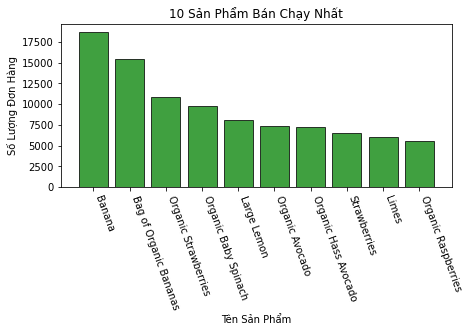

In [28]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_product_count, 
        color='green', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Bán Chạy Nhất')
plt.xlabel('Tên Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_product_name, rotation=-70, ha='left')
plt.show()

## 2.4. Những sản phẩm nào thường được re-ordered nhiều nhất?
Vẽ biểu đồ 10 loại sản phẩm được re-ordered nhiều nhất

In [29]:
values, counts = np.unique(reorder_product_id, return_counts=True)

# Thay vì dùng hàm lexsort(), dùng hàm argsort để lấy ra vị trí sắp xếp
sorted_count_index = np.argsort(counts)[::-1][0:10]

print("Index theo mảng đã sắp xếp:", sorted_count_index)

Index theo mảng đã sắp xếp: [15092  7956 12863 13349 29007 28659 28919 10192 16943 15902]


In [30]:
print("Giá trị đã sắp xếp:", counts[sorted_count_index])
print("ID của sản phẩm:", values[sorted_count_index])

Giá trị đã sắp xếp: [16557 13362  8603  8055  6226  6042  5923  4786  4279  4234]
ID của sản phẩm: [24852 13176 21137 21903 47766 47209 47626 16797 27966 26209]


**Lấy ra các tên sản phẩm tương ứng**

In [31]:
top10_reorderPro_id = values[sorted_count_index]
top10_reorderPro_count = counts[sorted_count_index]

In [32]:
# Lấy ra vị trí của các product
top10_reorderPro_index = [ds_product_id.index(pro_id) for pro_id in top10_reorderPro_id]
print(top10_reorderPro_index)

[24851, 13175, 21136, 21902, 47765, 47208, 47625, 16796, 27965, 26208]


In [33]:
# Lấy ra tên dựa theo vị trí tương ứng
top10_reorderPro_name = [ds_product_name[pro_idx] for pro_idx in top10_reorderPro_index]
print(top10_reorderPro_name)

['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Avocado', 'Organic Hass Avocado', 'Large Lemon', 'Strawberries', 'Organic Raspberries', 'Limes']


**Đưa lên biểu đồ**

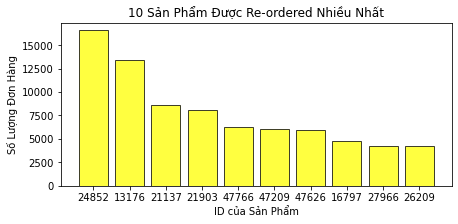

In [34]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_reorderPro_count, 
        color='yellow', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Được Re-ordered Nhiều Nhất')
plt.xlabel('ID của Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_reorderPro_id, rotation='horizontal')
plt.show()

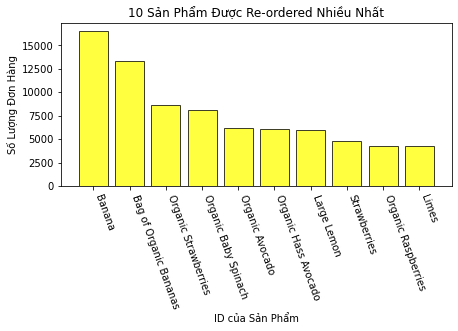

In [35]:
plt.figure(figsize = (7,3))
plt.bar(x=range(10), height=top10_reorderPro_count, 
        color='yellow', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.title('10 Sản Phẩm Được Re-ordered Nhiều Nhất')
plt.xlabel('ID của Sản Phẩm')
plt.ylabel('Số Lượng Đơn Hàng')
plt.xticks(range(10), top10_reorderPro_name, rotation=-70, ha='left')
plt.show()